In [1]:
import sys
print(sys.executable) # Permet de vérifier que mon environnement est bien utilisé dans ce notebook

/home/turpinli/micromamba/stageM2_micro/bin/python


In [2]:
!which pip

/home/turpinli/micromamba/stageM2_micro/bin/pip


In [3]:
from datetime import datetime, timedelta

import xarray as xr
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
from scipy import stats
import os 
os.listdir("/bettik/PROJECTS/pr-regional-climate/santolam/MARout_post/GRq/spin2/work")

import matplotlib.colors as mcolors # Import les palettes de couleurs
import cartopy.crs as ccrs # Permet d'utiliser des projections de cartes
import cartopy.feature as cfeature # Permet d'ajouter d'autres éléments à la carte


In [4]:
# ds_SMB = SMB sur la période 1980 - 2025
# ds_SMBy = SMB sur une année 
# SMB_day = Valeur de SMB à la date 
# SH_MAR = Altitude grille de MAR
# SMB_MAR = Valeur du SMB de MAR à la date de l'obs

In [5]:
k = 15 # Pixels à retirer aux bords du domaine (éviter effet de bord)

In [6]:
# MAR topography (pas la même correction que Xavier appliqué, car non nécessaire ici)

GridPath='/home/amoryc/'## Plot de la Temperature de surface de la grille correspondant au glacier Mera
Domain_grM='NST.2000.01.01.00.GRq.nc'

ds_grM= xr.open_dataset(GridPath+Domain_grM) # ds pour DataSet
#print(ds_grM)

ds_lon = ds_grM.LON[k:-k, k:-k] # Longitude
ds_lat = ds_grM.LAT[k:-k, k:-k] # Latitude
ds_SH  = ds_grM.SH[k:-k, k:-k] # Topographie en m
ds_ICE = ds_grM.ICE[k:-k, k:-k] # Pourcentage de glace par maille

# Coordonnées exactes du Peak Mera
merap_lat = 27.70984
merap_lon = 86.868662

# Carte de la région du Népal

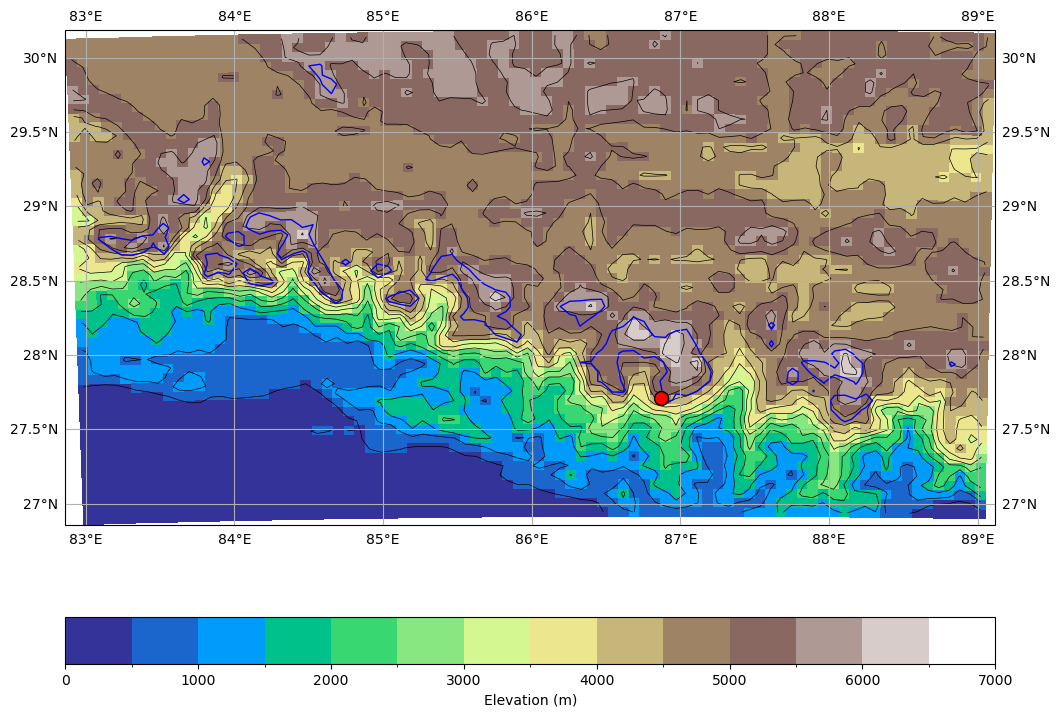

In [7]:
ice_level = 40 # Seuil à partir duquel on considère qu'on observe de la glace

clevs = np.arange(0, 7500, 500) # Echelle de couleur de topographie de 0 à 7500 tous les 500m d'alt
cmap = plt.get_cmap("terrain") # Palette de couleur pour les reliefs 
norm = mcolors.BoundaryNorm(boundaries=clevs, ncolors=cmap.N) # Attribut à chaque bande d'altitude une couleur de la palette "terrain"


fig, ax = plt.subplots(figsize=(12,12),subplot_kw={'projection': ccrs.PlateCarree()}) # Utilisation de la projection plate carré

#### Courbes de niveau (tous les 500m) ####
SH = ax.contour(ds_lon, ds_lat, ds_SH, 
           levels=[500,1000,1500,2000,2500,3000,3500,4000,4500,5000,5500,6000,6500,7000], # Affichage des lignes de topographie
           colors="k", linewidths=0.5,
           transform=ccrs.PlateCarree())
#ax.clabel(SH, SH.levels, inline=True, fontsize=6, fmt="%d", inline_spacing=1) # Affiche valeur sur les courbes

#### Countour glaciers ####
ax.contour(ds_lon, ds_lat, ds_ICE, 
           levels=[ice_level], # Défini les lignes de contour des glaciers (bleu) où la grille dépasse la valeur de ice_level 
           colors="b", linewidths=1,
           transform=ccrs.PlateCarree())

#### Mera Peak coord ####
ax.plot(merap_lon, merap_lat,  
        marker='o', markersize=10,
        markeredgecolor='black', markerfacecolor='red',
        transform=ccrs.PlateCarree())

#### Topographie ####
im = ax.pcolormesh(ds_lon, ds_lat, ds_SH,
                   cmap=cmap, norm=norm, # Affiche la couleur de la topographie
                   transform=ccrs.PlateCarree(),
                   shading="auto")

ax.gridlines(draw_labels=True) # Grille de lattitude et longitude
plt.colorbar(im, orientation="horizontal", pad=0.1, label="Elevation (m)") # Paramètres de la barre d'altitude (disposition horizontale / taille / légende)
plt.show()

# Carte de la région du Mera 

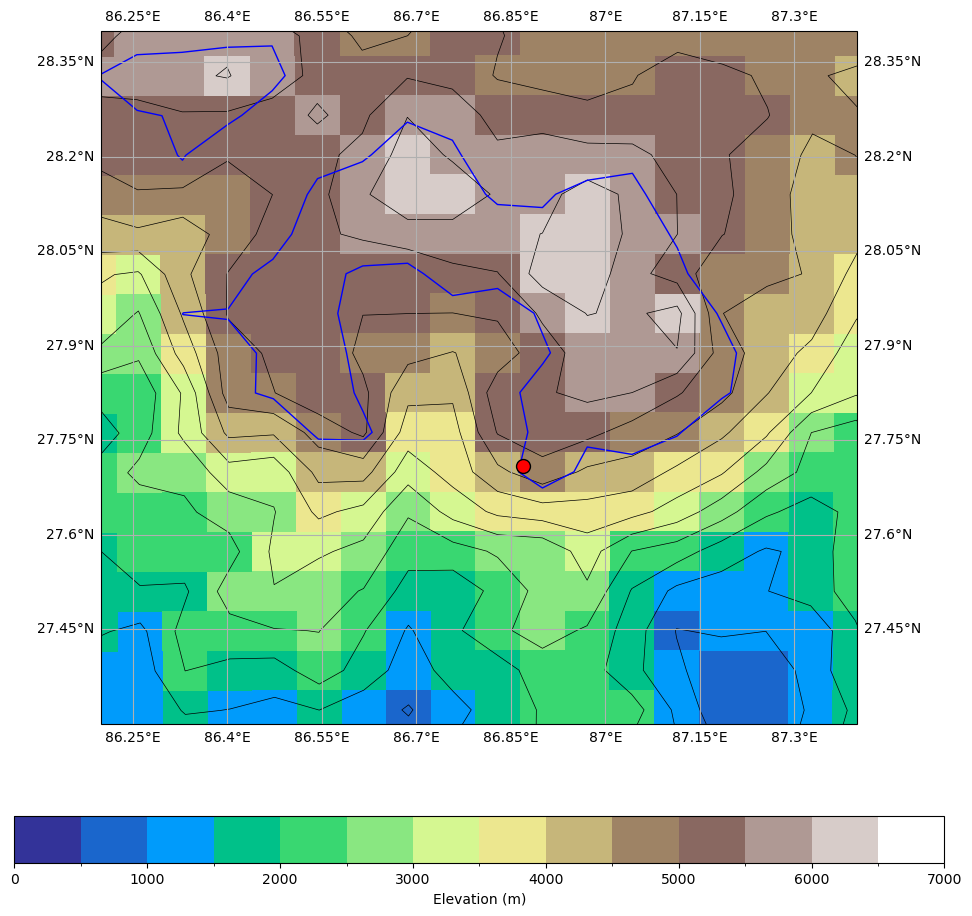

In [8]:
ice_level = 40 # Seuil à partir duquel on considère qu'on observe de la glace

clevs = np.arange(0, 7500, 500) # Echelle de couleur de topographie de 0 à 7500 tous les 500m d'alt
cmap = plt.get_cmap("terrain") # Palette de couleur pour les reliefs 
norm = mcolors.BoundaryNorm(boundaries=clevs, ncolors=cmap.N) # Attribut à chaque bande d'altitude une couleur de la palette "terrain"


fig, ax = plt.subplots(figsize=(12,12),subplot_kw={'projection': ccrs.PlateCarree()}) # Utilisation de la projection plate carré

#### Courbes de niveau (tous les 500m) ####
SH = ax.contour(ds_lon, ds_lat, ds_SH, 
           levels=[500,1000,1500,2000,2500,3000,3500,4000,4500,5000,5500,6000,6500,7000], # Affichage des lignes de topographie
           colors="k", linewidths=0.5,
           transform=ccrs.PlateCarree())
#ax.clabel(SH, SH.levels, inline=True, fontsize=6, fmt="%d", inline_spacing=1) # Affiche valeur sur les courbes

#### Countour glaciers ####
ax.contour(ds_lon, ds_lat, ds_ICE, 
           levels=[ice_level], # Défini les lignes de contour des glaciers (bleu) où la grille dépasse la valeur de ice_level 
           colors="b", linewidths=1,
           transform=ccrs.PlateCarree())

#### Mera Peak coord ####
ax.plot(merap_lon, merap_lat,  # Coord exact du Mera Peak
        marker='o', markersize=10,
        markeredgecolor='black', markerfacecolor='red',
        transform=ccrs.PlateCarree())

#### Topographie ####
im = ax.pcolormesh(ds_lon, ds_lat, ds_SH,
                   cmap=cmap, norm=norm, # Affiche la couleur de la topographie
                   transform=ccrs.PlateCarree(),
                   shading="auto")

ax.set_extent([86.2, 87.4, 27.3, 28.4], crs=ccrs.PlateCarree()) # Défini les limites (lon, lat) du domaine observable 
#ax.set_extent([86.7, 87.1, 27.6, 27.9], crs=ccrs.PlateCarree()) # Défini les limites (lon, lat) du domaine observable zoom

ax.gridlines(draw_labels=True) # Grille de lattitude et longitude
plt.colorbar(im, orientation="horizontal", pad=0.1, label="Elevation (m)") # Paramètres de la barre d'altitude (disposition horizontale / taille / légende)
plt.show()

In [9]:
#ds_grM.TT.attrs # Donne les attributs de la variable regardée

In [10]:
"""# isel() selectionne l'index dans un tableau --> level=0 sélectionne le niveau vertical 0 --> time=0 est le premier temps du fichier
ds_TT_surf = ds_grM.TT.isel(time=0, level=0)[k:-k, k:-k] - 273.15 # Correction longitude latitude sur la variable
print(ds_TT_surf.shape)
print(ds_lon.shape)
print(ds_lat.shape)"""

"# isel() selectionne l'index dans un tableau --> level=0 sélectionne le niveau vertical 0 --> time=0 est le premier temps du fichier\nds_TT_surf = ds_grM.TT.isel(time=0, level=0)[k:-k, k:-k] - 273.15 # Correction longitude latitude sur la variable\nprint(ds_TT_surf.shape)\nprint(ds_lon.shape)\nprint(ds_lat.shape)"

In [11]:
"""fig, ax = plt.subplots(figsize=(10,10),
                       subplot_kw={'projection': ccrs.PlateCarree()})

im = ax.pcolormesh(ds_lon, 
                   ds_lat, 
                   ds_TT_surf, 
                   cmap="coolwarm", 
                   shading="auto",
                   transform=ccrs.PlateCarree())

ax.gridlines(draw_labels=True)

plt.colorbar(im, orientation="horizontal", pad=0.05, label="Temperature (°)")
plt.show()"""

'fig, ax = plt.subplots(figsize=(10,10),\n                       subplot_kw={\'projection\': ccrs.PlateCarree()})\n\nim = ax.pcolormesh(ds_lon, \n                   ds_lat, \n                   ds_TT_surf, \n                   cmap="coolwarm", \n                   shading="auto",\n                   transform=ccrs.PlateCarree())\n\nax.gridlines(draw_labels=True)\n\nplt.colorbar(im, orientation="horizontal", pad=0.05, label="Temperature (°)")\nplt.show()'

### Identification des indices X et Y de la grille correspondant au glacier Mera 
#### C'est à dire le point de grille le plus proche des coordonnées réelles


In [12]:
#### Récupération des indices de la grille pour afficher des variables uniquement sur cette grille ####

dist = np.sqrt((ds_lat - merap_lat)**2 + (ds_lon - merap_lon)**2) # Calcul des distances entre les centres des grilles et coordonnées du Mera Peak
 
# index 1D du minimum
idx_1d = dist.argmin().item() # Recherche de la distance minimale avec argmin

# conversion en indices 2D (Y,X) 
iY, iX = np.unravel_index(idx_1d, dist.shape)

print("Indice Y :", iY)
print("Indice X :", iX)
print("Latitude trouvée :", ds_lat[iY, iX].item())
print("Longitude trouvée :", ds_lon[iY, iX].item())

Indice Y : 12
Indice X : 55
Latitude trouvée : 27.69999885559082
Longitude trouvée : 86.89999389648438


In [13]:
"""print(ds_TT_surf.dims)
print(ds_grM.TT.dims)
print(ds_grM.TT.time.values[:100])

plt.figure(figsize=(10,5))
ds_TT = ds_grM.TT.isel(y=iY, x=iX) - 273.15 
ds_TT.plot()

plt.title("TTZ – Mera grid")
plt.ylabel("TTZ (°C)")
plt.show()"""

'print(ds_TT_surf.dims)\nprint(ds_grM.TT.dims)\nprint(ds_grM.TT.time.values[:100])\n\nplt.figure(figsize=(10,5))\nds_TT = ds_grM.TT.isel(y=iY, x=iX) - 273.15 \nds_TT.plot()\n\nplt.title("TTZ – Mera grid")\nplt.ylabel("TTZ (°C)")\nplt.show()'

# Temperature de surface de la grille du Mera

In [14]:
variable = 'TTZ'
DataPath = '/bettik/PROJECTS/pr-regional-climate/santolam/MARout_post/GRq/spin2/work/daily/' # Chemin vers les fichiers contenant les données
file = variable+'_day_MARv3.14_ER5_spin2_GRq_1980-2024.nc' # Fichier de données sur la période 1980-2024 pour la 'variable' associée

ds_TTZ = xr.open_dataset(DataPath+file) 
ds_TTZ_surf = ds_TTZ.isel(ZTQLEV=0).TTZ.load() # ZTQLEV indique le niveau observé (ici 0=surface ?)

ds_TTZ_surf = ds_TTZ_surf[:,k:-k,k:-k] # Correction des effets de bord (k pixel)

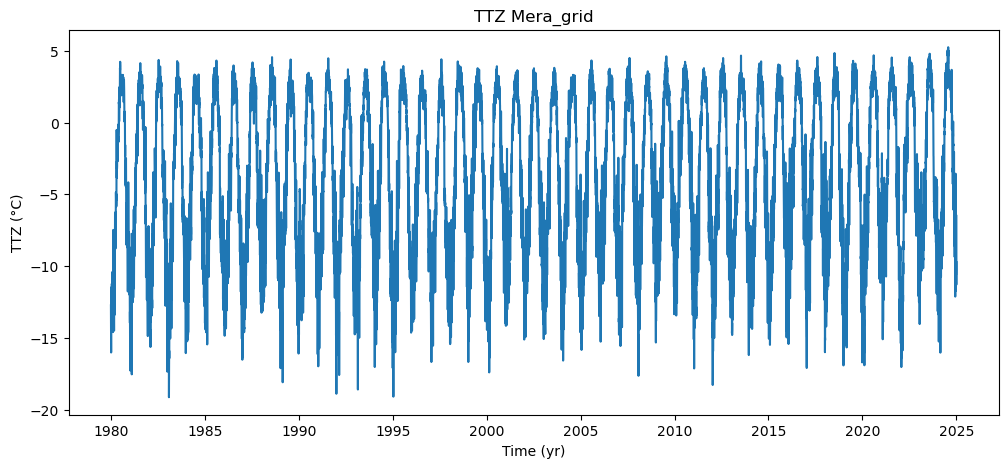

In [15]:
# Plot de la temperature de surface (ZTQLEV=0) du point de grille du Mera glacier
plt.figure(figsize=(12,5))

ds_TTZ_surf.isel(Y=iY, X=iX).plot() # Affiche la temperature pour la grille à l'index iY,iX

plt.title("TTZ Mera_grid")
plt.ylabel("TTZ (°C)")
plt.xlabel("Time (yr)")
plt.show()

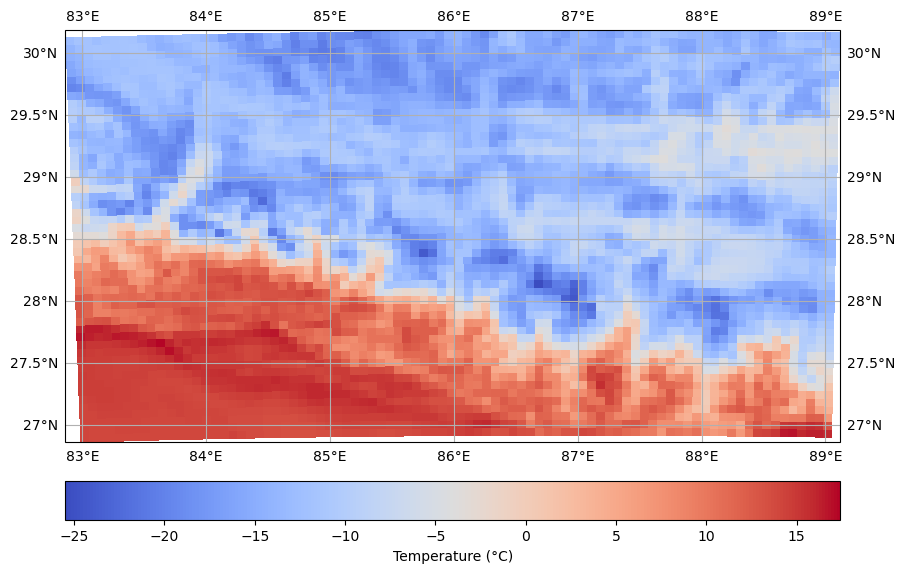

In [16]:
# isel() selectionne l'index dans un tableau --> level=0 sélectionne le niveau vertical 0 --> time=0 est le premier temps du fichier
# Faire .TTZ.isel() permet de passer de xarray.Dataset en xarray.DataArray --> On ne sélectionne qu'une variable qu'on peut afficher avec pcolormesh après
ds_TTZ_map = ds_TTZ.TTZ.isel(TIME=0, ZTQLEV=0)[k:-k, k:-k] # Correction longitude latitude sur la variable

fig, ax = plt.subplots(figsize=(10,10),
                       subplot_kw={'projection': ccrs.PlateCarree()})

im = ax.pcolormesh(ds_lon, 
                   ds_lat, 
                   ds_TTZ_map, 
                   cmap="coolwarm", 
                   shading="auto",
                   transform=ccrs.PlateCarree())

ax.gridlines(draw_labels=True)

plt.colorbar(im, orientation="horizontal", pad=0.05, label="Temperature (°C)")
plt.show()

# SMB de la grille correspondant au glacier Mera

In [17]:
variable = 'SMB'
DataPath = '/bettik/PROJECTS/pr-regional-climate/santolam/MARout_post/GRq/spin2/work/daily/' 
file = variable+'_day_MARv3.14_ER5_spin2_GRq_1980-2024.nc'

ds_SMB = xr.open_dataset(DataPath+file).SMB.isel(SECTOR=0).load() # SECTOR ?
ds_SMB = ds_SMB[:,k:-k,k:-k]

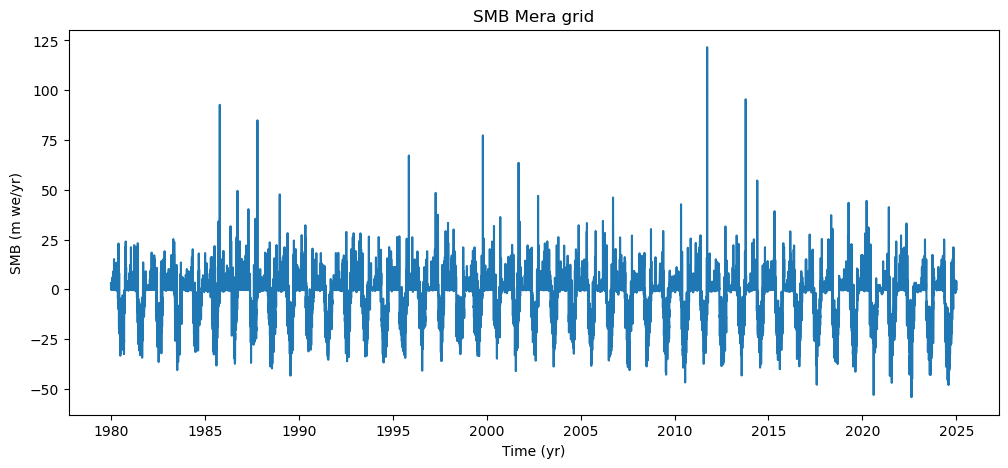

In [18]:
# Plot du SMB du point de grille du Mera glacier
plt.figure(figsize=(12,5))

ds_SMB.isel(Y=iY, X=iX).plot() 

plt.title("SMB Mera grid")
plt.ylabel("SMB (m we/yr)")
plt.xlabel("Time (yr)")
plt.show()

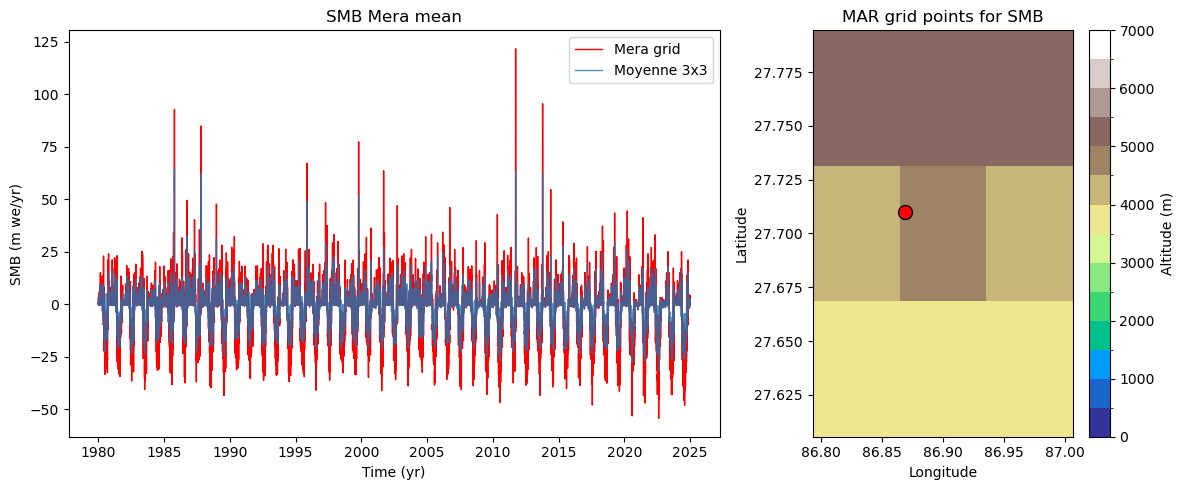

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(12,5), gridspec_kw={'width_ratios': [2, 1]}) # Défini le ratio de taille entre les deux figures

###### SMB time series ######
plt.sca(axes[0])
ds_SMB.isel(Y=iY, X=iX).plot(label="Mera grid", linewidth=1, color='r') # Plot le SMB de la grille Mera

# Slice permet d'extraire les points voisins au point iY,iX (le dernier indice iX est exclu) et mean fait la moyenne des SMB du bloc
ds_SMB.isel(Y=slice(iY-1, iY+2), X=slice(iX-1, iX+2)).mean(dim=["Y", "X"]).plot(label="Moyenne 3x3", linewidth=1, alpha=0.8) # Moyenne de la grille Mera et ses voisins proches

plt.title("SMB Mera mean")
plt.ylabel("SMB (m we/yr)")
plt.xlabel("Time (yr)")
plt.legend()

####### Grid ######
plt.sca(axes[1])
ds_SH2 = ds_SH.isel(y=slice(iY-1, iY+2), x=slice(iX-1, iX+2)) # Selectionne le SMB sur les grilles données
ds_lat_mera2 = ds_lat.isel(y=slice(iY-1, iY+2), x=slice(iX-1, iX+2)) # Selectionne les lon lat pour les plot
ds_lon_mera2 = ds_lon.isel(y=slice(iY-1, iY+2), x=slice(iX-1, iX+2))

x, y = np.meshgrid([0,1,2], [0,1,2])

clevs = np.arange(0, 7500, 500) # Echelle de couleur de topographie de 0 à 7500 tout les 500m d'alt
cmap = plt.get_cmap("terrain") # Palette de couleur pour les reliefs 
norm = mcolors.BoundaryNorm(boundaries=clevs, ncolors=cmap.N) # Attribut à chaque bande d'altitude une couleur de la palette "terrain"

plt.plot(merap_lon, merap_lat, marker='o', markersize=10, markeredgecolor='black', markerfacecolor='red') # Mera peak

plt.pcolormesh(ds_lon_mera2, ds_lat_mera2, ds_SH2, cmap=cmap, norm=norm, shading='auto')
#plt.pcolormesh(x, y, ds_SH3X3, cmap='terrain', shading='auto', vmin=0, vmax=7000) # Pour ne pas lisser l'échelle d'altitude
plt.colorbar(label="Altitude (m)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("MAR grid points for SMB")
plt.tight_layout()

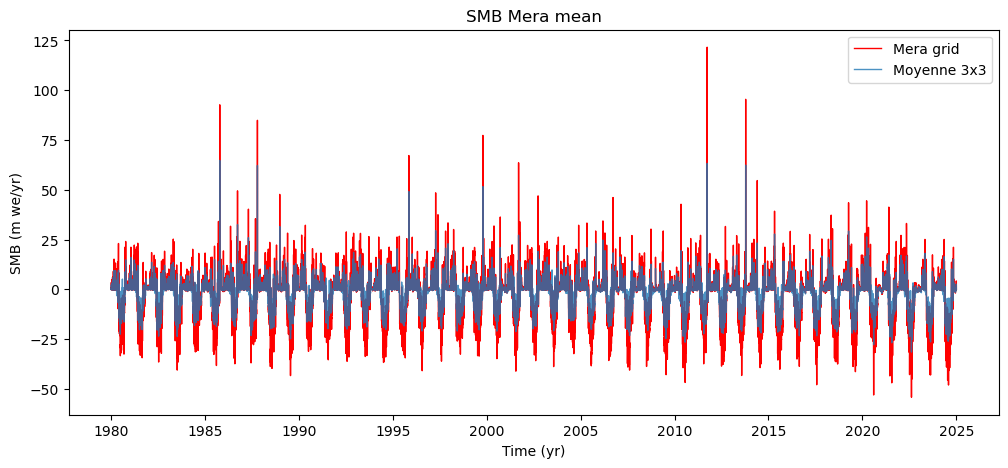

In [20]:
plt.figure(figsize=(12,5))

ds_SMB.isel(Y=iY, X=iX).plot(label="Mera grid", linewidth=1, color='r') # Plot le SMB de la grille Mera

# Slice permet d'extraire les points voisins au point iY,iX (le dernier indice iX est exclu) et mean fait la moyenne des SMB du bloc
ds_SMB.isel(Y=slice(iY-1, iY+2), X=slice(iX-1, iX+2)).mean(dim=["Y", "X"]).plot(label="Moyenne 3x3", linewidth=1, alpha=0.8) # Moyenne de la grille Mera et ses voisins proches

plt.title("SMB Mera mean")
plt.ylabel("SMB (m we/yr)")
plt.xlabel("Time (yr)")
plt.legend()
plt.show()

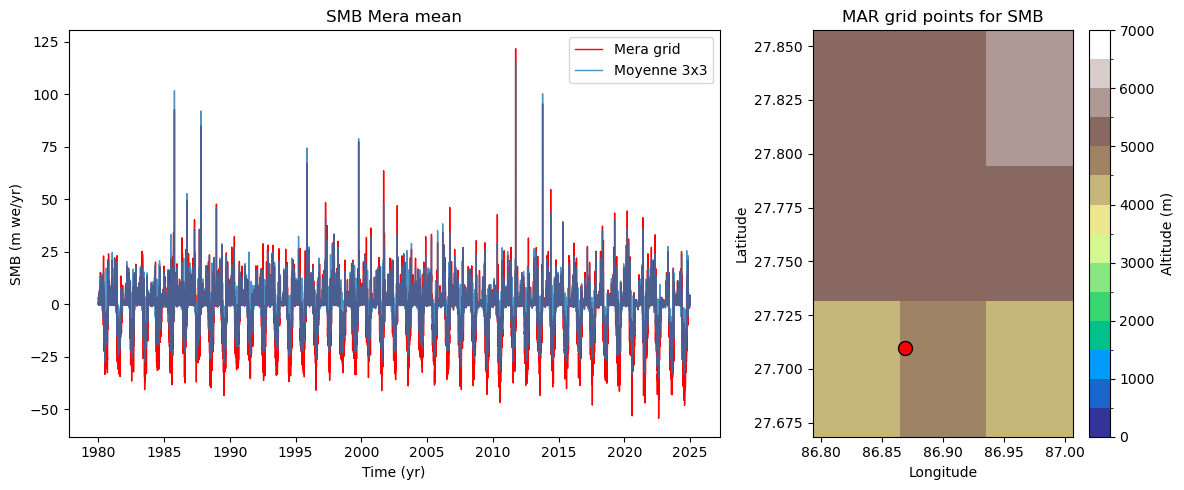

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(12,5), gridspec_kw={'width_ratios': [2, 1]}) # Défini le ratio de taille entre les deux figures

###### SMB time series ######
plt.sca(axes[0])
ds_SMB.isel(Y=iY, X=iX).plot(label="Mera grid", linewidth=1, color='r') # Plot le SMB de la grille Mera

# Slice permet d'extraire les points voisins au point iY,iX (le dernier indice iX est exclu) et mean fait la moyenne des SMB du bloc
ds_SMB.isel(Y=slice(iY, iY+3), X=slice(iX-1, iX+2)).mean(dim=["Y", "X"]).plot(label="Moyenne 3x3", linewidth=1, alpha=0.8) # Moyenne de la grille Mera et ses voisins (au nord?!)

plt.title("SMB Mera mean")
plt.ylabel("SMB (m we/yr)")
plt.xlabel("Time (yr)")
plt.legend()

####### Grid ######
plt.sca(axes[1])
ds_SH3 = ds_SH.isel(y=slice(iY, iY+3), x=slice(iX-1, iX+2)) # /!\/!\/!\ Ici 'y' est lu de bas en haut comme dans meshgrid. Cherher à afficher des points au dessus de Mera grid revient à ajouter des indices à 'y'
ds_lat_mera3 = ds_lat.isel(y=slice(iY, iY+3), x=slice(iX-1, iX+2)) # Selectionne les lon lat pour les plot
ds_lon_mera3 = ds_lon.isel(y=slice(iY, iY+3), x=slice(iX-1, iX+2))

x, y = np.meshgrid([0,1,2], [0,1,2])

clevs = np.arange(0, 7500, 500) # Echelle de couleur de topographie de 0 à 7500 tout les 500m d'alt
cmap = plt.get_cmap("terrain") # Palette de couleur pour les reliefs 
norm = mcolors.BoundaryNorm(boundaries=clevs, ncolors=cmap.N) # Attribut à chaque bande d'altitude une couleur de la palette "terrain"
plt.plot(merap_lon, merap_lat, marker='o', markersize=10, markeredgecolor='black', markerfacecolor='red') # Mera peak

plt.pcolormesh(ds_lon_mera3, ds_lat_mera3, ds_SH3, cmap=cmap, norm=norm, shading='auto')
#plt.pcolormesh(x, y, ds_SH3X3UP, cmap='terrain', shading='auto', vmin=0, vmax=7000) # Pour ne pas lisser l'échelle d'altitude
plt.colorbar(label="Altitude (m)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("MAR grid points for SMB")
plt.tight_layout()

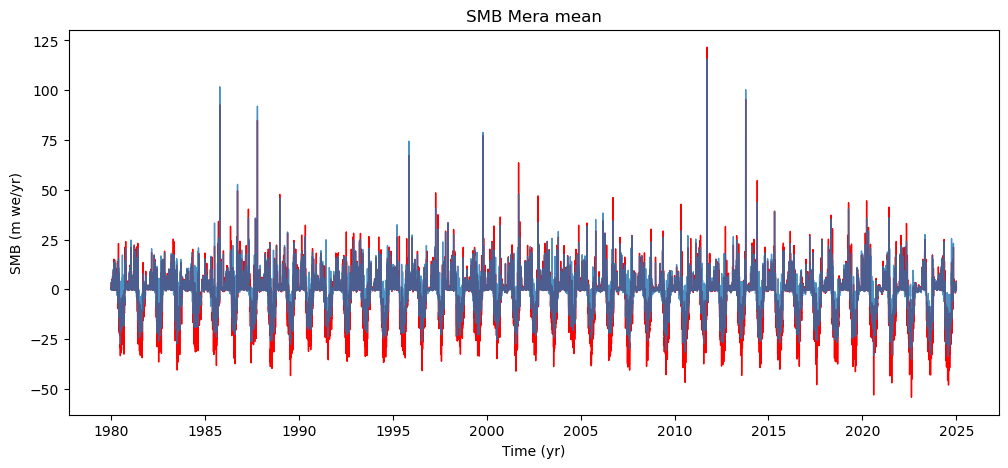

In [22]:
plt.figure(figsize=(12,5))

ds_SMB.isel(Y=iY, X=iX).plot(label="Mera grid", linewidth=1, color='r') # Plot le SMB de la grille Mera

ds_SMB.isel(Y=slice(iY, iY+3), X=slice(iX-1, iX+2)).mean(dim=["Y", "X"]).plot(label="Moyenne 3x3", linewidth=1, alpha=0.8) # Moyenne de la grille Mera et ses voisins (au nord?!)

plt.title("SMB Mera mean")
plt.ylabel("SMB (m we/yr)")
plt.xlabel("Time (yr)")
plt.show()

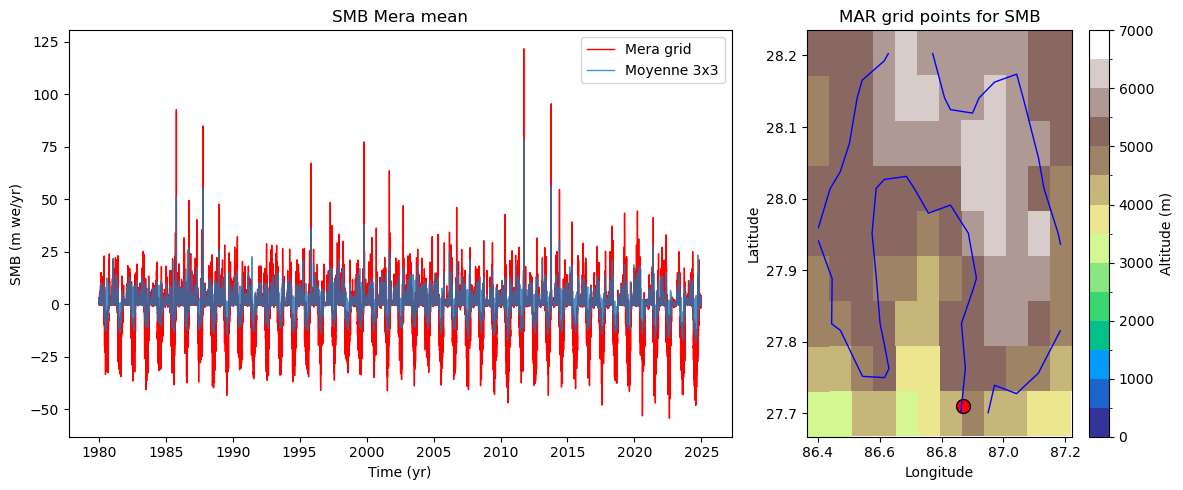

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(12,5), gridspec_kw={'width_ratios': [2, 1]}) # Défini le ratio de taille entre les deux figures

###### SMB time series ######
plt.sca(axes[0])
ds_SMB.isel(Y=iY, X=iX).plot(label="Mera grid", linewidth=1, color='r') # Plot le SMB de la grille Mera

# Slice permet d'extraire les points voisins au point iY,iX (le dernier indice iX est exclu) et mean fait la moyenne des SMB du bloc
ds_SMB.isel(Y=slice(iY, iY+9), X=slice(iX-7, iX+5)).mean(dim=["Y", "X"]).plot(label="Moyenne 3x3", linewidth=1, alpha=0.8) # Moyenne de la grille Mera et ses voisins (au nord?!)

plt.title("SMB Mera mean")
plt.ylabel("SMB (m we/yr)")
plt.xlabel("Time (yr)")
plt.legend()

####### Grid ######
plt.sca(axes[1])
ds_SH_khumbu = ds_SH.isel(y=slice(iY, iY+9), x=slice(iX-7, iX+5)) # /!\/!\/!\ Ici 'y' est lu de bas en haut comme dans meshgrid. Cherher à afficher des points au dessus de Mera grid revient à ajouter des indices à 'y'
ds_ICE_khumbu = ds_ICE.isel(y=slice(iY, iY+9), x=slice(iX-7, iX+5))
ds_lat_khumbu = ds_lat.isel(y=slice(iY, iY+9), x=slice(iX-7, iX+5)) # Selectionne les lon lat pour les plot
ds_lon_khumbu = ds_lon.isel(y=slice(iY, iY+9), x=slice(iX-7, iX+5))

x, y = np.meshgrid([0,1,2], [0,1,2])

clevs = np.arange(0, 7500, 500) # Echelle de couleur de topographie de 0 à 7500 tout les 500m d'alt
cmap = plt.get_cmap("terrain") # Palette de couleur pour les reliefs 
norm = mcolors.BoundaryNorm(boundaries=clevs, ncolors=cmap.N) # Attribut à chaque bande d'altitude une couleur de la palette "terrain"
plt.plot(merap_lon, merap_lat, marker='o', markersize=10, markeredgecolor='black', markerfacecolor='red') # Mera peak

plt.contour(ds_lon_khumbu, ds_lat_khumbu, ds_ICE_khumbu, levels=[ice_level], colors="b", linewidths=1) # Contours glaciers

plt.pcolormesh(ds_lon_khumbu, ds_lat_khumbu, ds_SH_khumbu, cmap=cmap, norm=norm, shading='auto')
#plt.pcolormesh(x, y, ds_SH3X3UP, cmap='terrain', shading='auto', vmin=0, vmax=7000) # Pour ne pas lisser l'échelle d'altitude
plt.colorbar(label="Altitude (m)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("MAR grid points for SMB")
plt.tight_layout()

In [24]:
SMB_day = ds_SMB.isel(TIME=100, Y=iY, X=iX) # Valeur du SMB au 100 jour de la série (10/04/1980)

print(SMB_day.values)
print(ds_SMB.TIME[100].values)

3.0039062
1980-04-10T12:00:00.000000000


In [25]:
variable = 'SMB'
DataPath = '/bettik/PROJECTS/pr-regional-climate/santolam/MARout_post/GRq/spin2/work/daily/' 
file = variable+'_daysum_MARv3.14_ER5_spin2_GRq_2010.nc'

ds_SMBy = xr.open_dataset(DataPath+file).SMB.isel(SECTOR=0).load() # SECTOR ?
ds_SMBy = ds_SMBy[:,k:-k,k:-k]

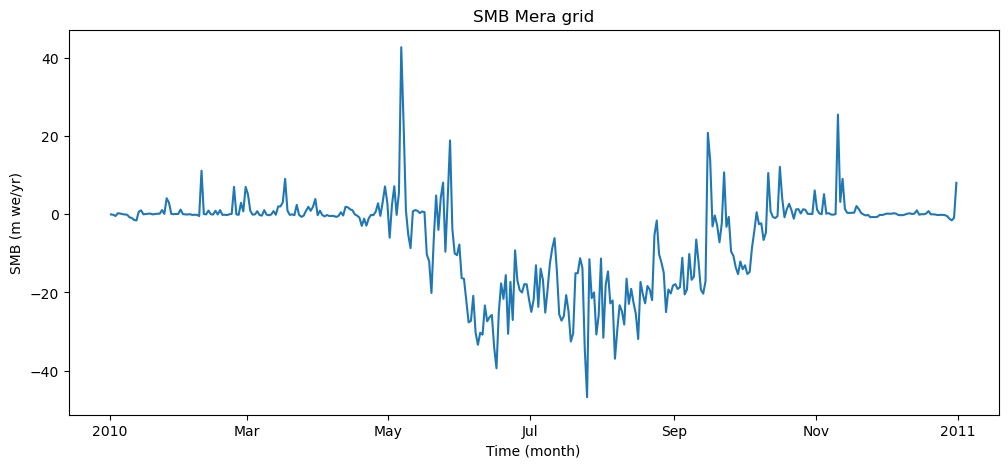

In [26]:
# Plot du SMB du point de grille du Mera glacier
plt.figure(figsize=(12,5))

ds_SMBy.isel(Y=iY, X=iX).plot() 

plt.title("SMB Mera grid")
plt.ylabel("SMB (m we/yr)")
plt.xlabel("Time (month)")
plt.show()

 ## Attention, ici j'ai choisi 'iloc[4]', cad prends la 4ème valeur de la colonne arbitrairement, mais il faudrait faire une moyenne pondérée sur tous les jours d'acquisitions

In [27]:
# Ouverture fichier xlsx Glacioclim et récupération date de l'observation
df = pd.read_excel('/home/turpinli/Mera_SMB/AnnualMB_Mera_09_10.xlsx', header=1) #pandas permet ici de lire les fichiers .xlsx et prenant les colonnes à partir de la 2ème ligne
date_obs = df["Date_end"].iloc[4].replace(hour=12, minute=0, second=0) # Récupère la date de la mesure SMB
date_obs = date_obs.strftime("%Y-%m-%dT%H:%M:%S") # Formate l'écriture de la date au format MAR
print('Date_OBS:', date_obs)

Date_OBS: 2010-11-09T12:00:00


In [28]:
# Valeur du SMB dans MAR grâce à la date exact de Glacioclim
SMB_day = ds_SMBy.sel(TIME=date_obs).isel(Y=iY, X=iX) # Récupère la valeur du SMB à la date de l'observation
SMB_MAR = SMB_day.values 
print('SMB_MAR =', SMB_day.values, 'm w.e')
print('Date_MAR:', ds_SMBy.sel(TIME=date_obs).TIME.values) # Affiche la date dans le fichier

# Donne l'altitude la grille de MAR correspondant au Peak Mera
SH_MAR = ds_SH.isel(y=iY, x=iX)
print('Grid alt =', SH_MAR.values, 'm')

SMB_MAR = 0.041015625 m w.e
Date_MAR: 2010-11-09T12:00:00.000000000
Grid alt = 4831.3545 m


In [29]:
#print(ds_SMBy.SECTOR.values)
#print(ds_SMBy.SECTOR)
#print(ds_SMBy)

In [30]:
# Créer le pont entre les obervations et MAR
#%run SMB_OBS.ipynb # Run le plot des observations
#ax = smb_obs(df)
#ax.scatter(SMB_MAR, SH_MAR, color="red", label="MAR") # Affiche le point de MAR correspondant à la date des obs
#plt.legend()
#plt.show()

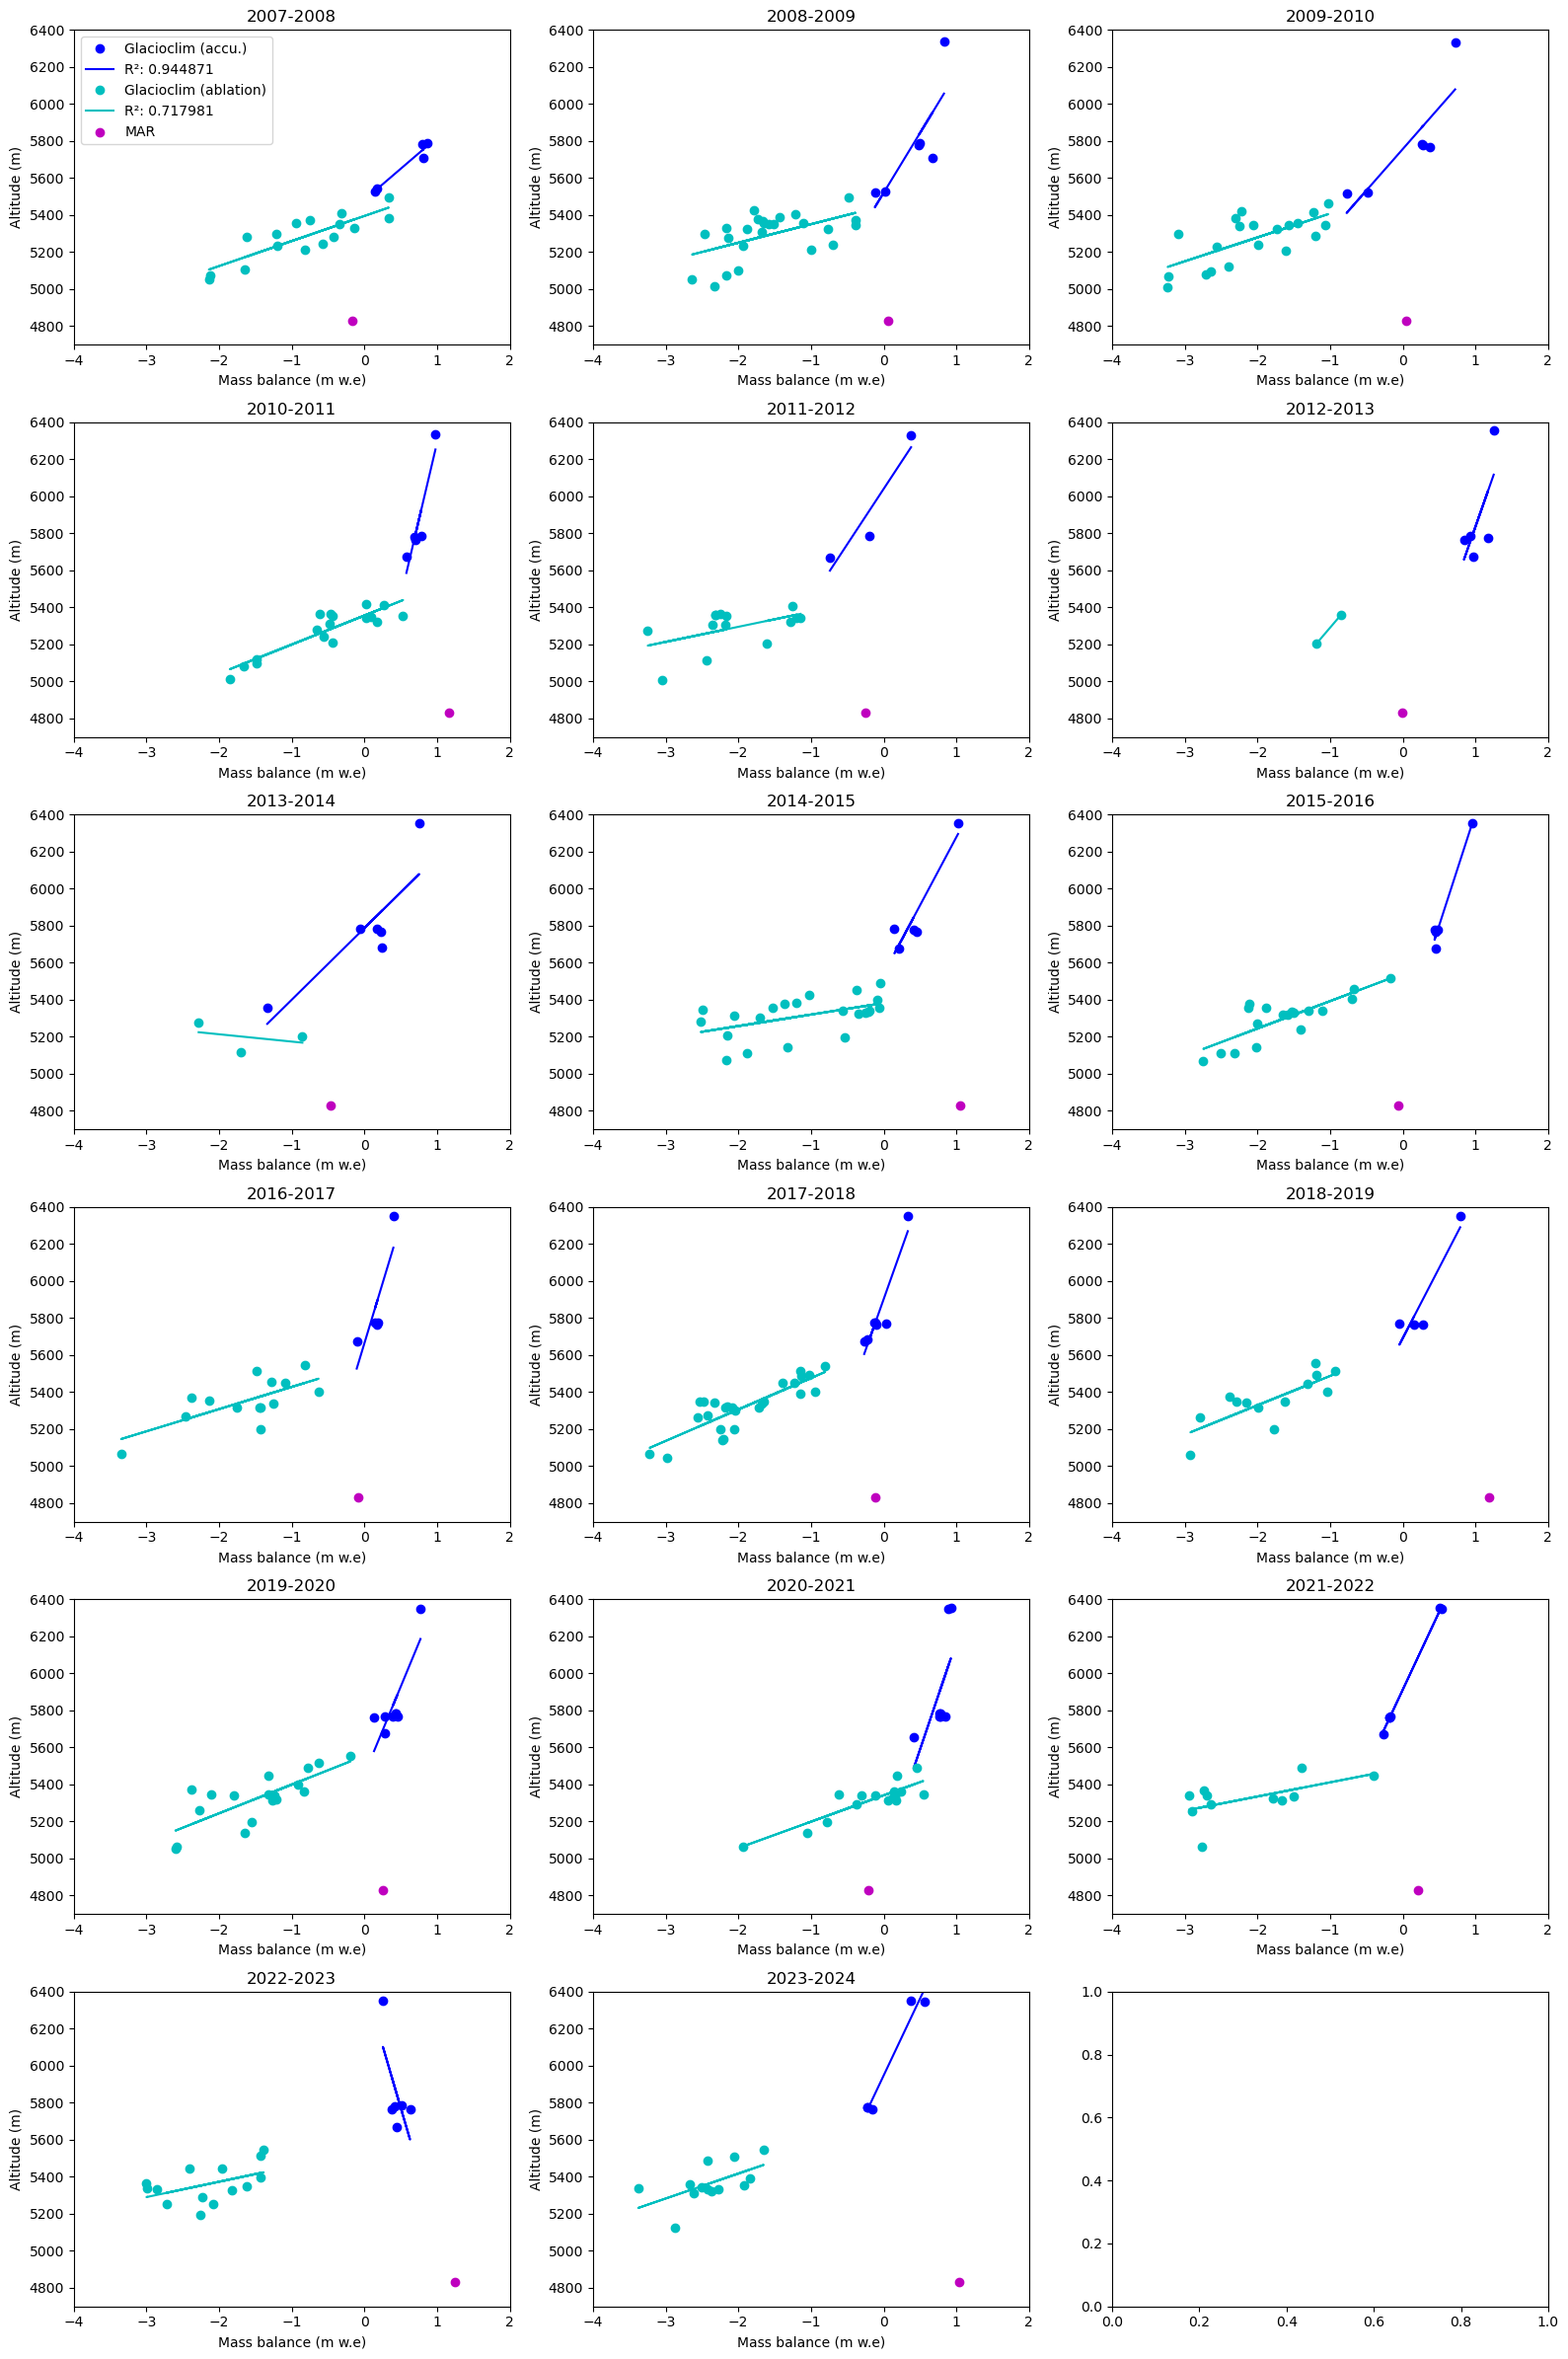

In [31]:
####### Data loading ######
variable = 'SMB'
DataPath = '/bettik/PROJECTS/pr-regional-climate/santolam/MARout_post/GRq/spin2/work/daily/' 

###### Defining subplot ######
yy = [f"{i:02}" for i in range(7, 26)] # Liste des années sous le format yy

n = len(yy)-2
col = 3
line = int(np.ceil(n/col)) # Arrondi à l'entier supérieur le nombre de colonne à plot, et le met au format 'nombre entier'
fig, axes = plt.subplots(line,col,figsize=(16,4*line))
axes = axes.flatten() # Transforme le tableau 2D en tableau 1D (accessible avec 1 indice (j))



for j in range(n):
    ax = axes[j] # Remplissage subplot avec indice de la boucle

###### OBS_data loading and sorting ######    
    df = pd.read_excel('/home/turpinli/Mera_SMB/AnnualMB_Mera_'+yy[j]+'_'+yy[j+1]+'.xlsx', header=1) #pandas permet ici de lire les fichiers .xlsx et prenant les colonnes à partir de la 2ème ligne
    date_obs = df["Date_end"].iloc[4].replace(hour=12, minute=0, second=0) # Récupère la date de la mesure SMB
    date_obs = date_obs.strftime("%Y-%m-%dT%H:%M:%S") # Formate l'écriture de la date au format MAR

    MB = df.filter(regex=r"^Mass balance \(").columns[0] # Regex recupère les données dans la colonne Mass balance, peut importe ce qui suit dans la chaine de caractères 
    df[MB] = pd.to_numeric(df[MB], errors="coerce") # Force la colonne à prendre la forme d'un nombre (car unité en haut de colonne)
    df["Altitude_end"] = pd.to_numeric(df["Altitude_end"], errors="coerce") # Coerce donne NaN si la valeur n'est pas convertible en nombre

    df = df.dropna(subset=["Altitude_end",MB]) # Supprime les NaN dans les colonnes

    df_ablation = df[df["#station"].str.match(r"^\d") | (df["#station"] == "AWS")] # Catégorise les stations qui commencent par un chiffre ou qui sont strictement AWS, en ablaion
    df_accu = df[~(df["#station"].str.match(r"^\d") | (df["#station"] == "AWS"))] # Le ~ est la condition "not" --> Tout le reste / (r"^\d" identifie les chiffres) et "|" vérifie les deux conditions 

    
###### Accumulation ######
    x_accu = df_accu[MB]
    y_accu = df_accu["Altitude_end"]

    ax.plot(x_accu,y_accu, linestyle="", marker="o",color='b', label='Glacioclim (accu.)')
    
    if len(x_accu)>=2: # Regression linéaire si 2 valeurs ou plus
        res = stats.linregress(x_accu, y_accu) # Régression linéaire sur les deux séries de données
        # La régression linéaire contient naturellement des informations comme slope = pente de regression / intercept = ordonnée à l'origine / rvalue = coeff de corrélation / pvalue
        ax.plot(x_accu,res.intercept+res.slope*x_accu, 'b', label=f"R²: {res.rvalue**2:.6f}") # \np-value: {res.pvalue:.6g}") # Trace x par y =ax+b=slope*x+intercept)

    
##### Ablation ######
    x_ablation = df_ablation[MB]
    y_ablation = df_ablation["Altitude_end"]

    ax.plot(x_ablation,y_ablation, linestyle="", marker="o", color='c', label='Glacioclim (ablation)')
    
    if len(x_ablation)>=2:
        res = stats.linregress(x_ablation, y_ablation) # Régression linéaire sur les deux séries de données
        ax.plot(x_ablation,res.intercept+res.slope*x_ablation, 'c', label=f"R²: {res.rvalue**2:.6f}") # \np-value: {res.pvalue:.6g}") # Trace x par y =ax+b=slope*x+intercept)
    

###### MAR_data loading and sorting  ######    
    file = variable+'_daysum_MARv3.14_ER5_spin2_GRq_20'+yy[j+1]+'.nc'
    ds_SMBy = xr.open_dataset(DataPath+file).SMB.isel(SECTOR=0).load() # SECTOR ?
    ds_SMBy = ds_SMBy[:,k:-k,k:-k]
    
    SMB_day = ds_SMBy.sel(TIME=date_obs).isel(Y=iY, X=iX) # Valeur du SMB à la date exact de l'obs (glacioclim)
    SMB_MAR = SMB_day.values 
#    print('SMB_MAR =', SMB_day.values, 'm w.e')
#    print('Date_MAR:', ds_SMBy.sel(TIME=date_obs).TIME.values) # Affiche la date dans le fichier

    SH_MAR = ds_SH.isel(y=iY, x=iX) # Altitude de la grille de MAR au Peak Mera (coord iY,iX)
#    print('Grid alt =', SH_MAR.values, 'm')
    
    ax.scatter(SMB_MAR, SH_MAR, color="m", label="MAR") # Affiche le point de MAR correspondant à la date des obs

###### Graphic features ######
    ax.set_title(f"20{yy[j]}-20{yy[j+1]}")
    ax.set_xlabel("Mass balance (m w.e)")
    ax.set_ylabel("Altitude (m)")
    ax.set_xlim(-4, 2)
    ax.set_ylim(4700, 6400)
    
    if j == 0: # Affiche la légende pour la première figure
        ax.legend()

plt.tight_layout()

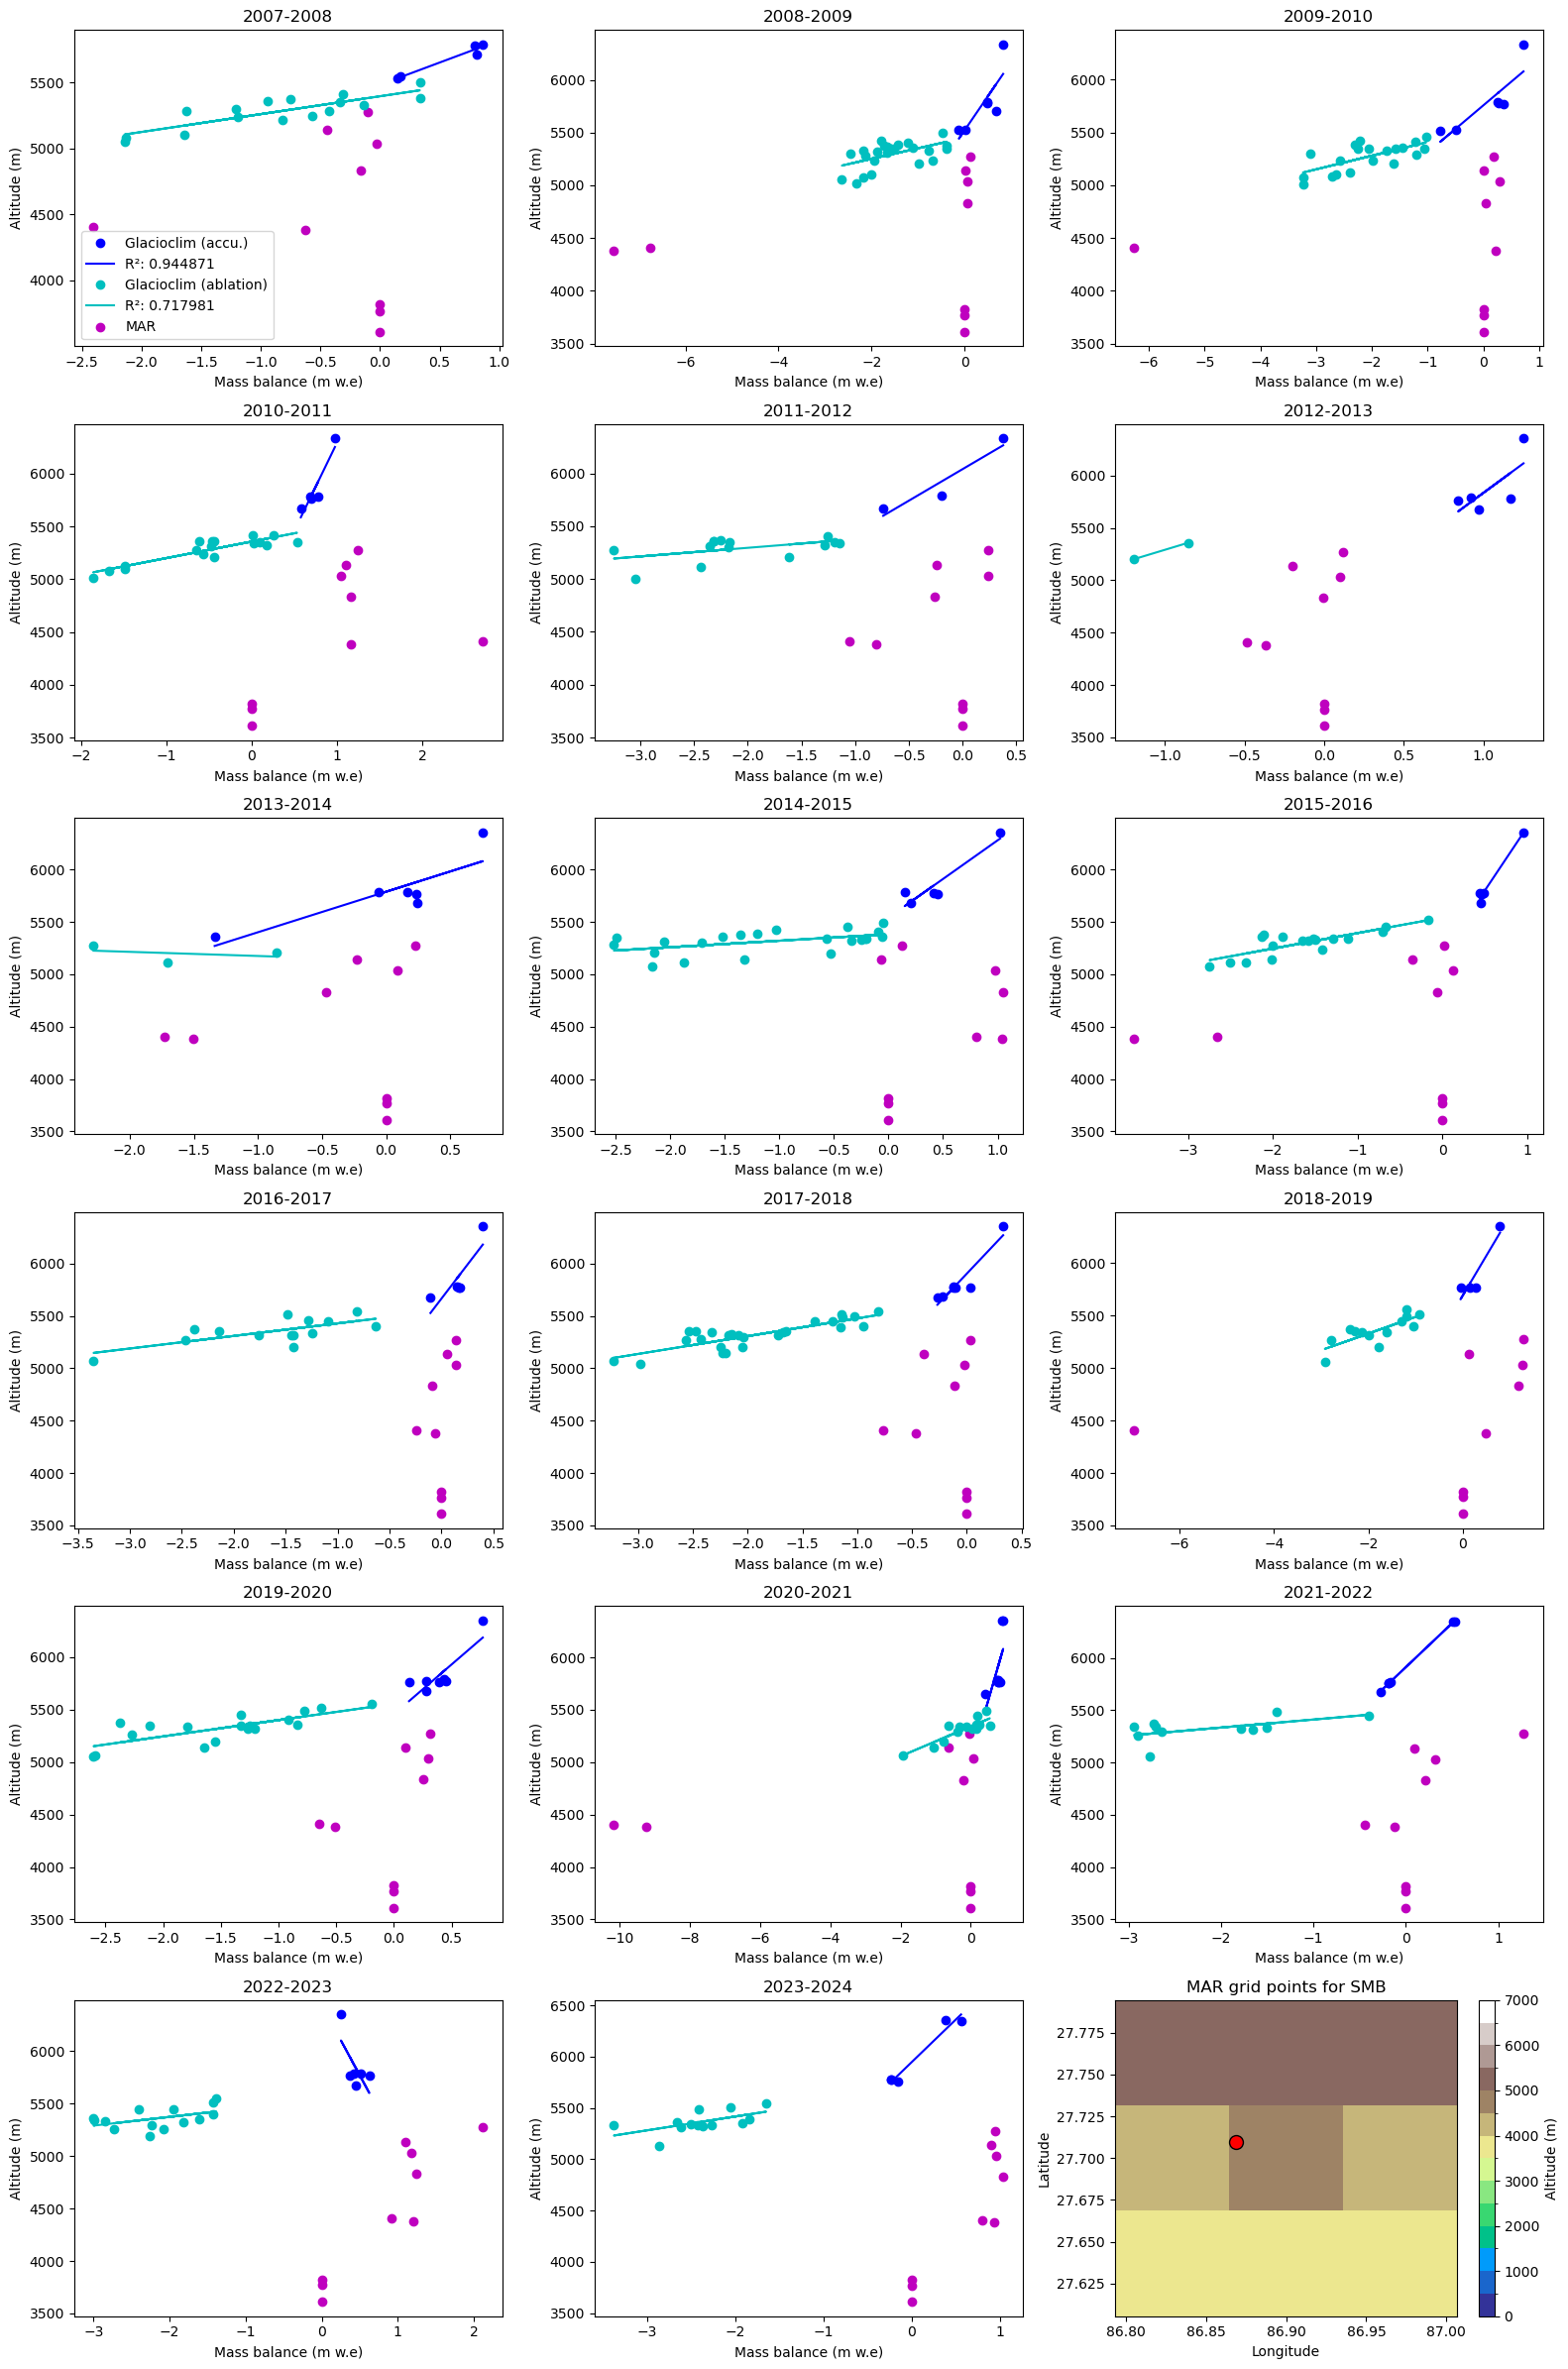

In [32]:
####### Data loading ######
variable = 'SMB'
DataPath = '/bettik/PROJECTS/pr-regional-climate/santolam/MARout_post/GRq/spin2/work/daily/' 

###### Defining subplot ######
yy = [f"{i:02}" for i in range(7, 26)] # Liste des années sous le format yy

n = len(yy)-2
col = 3
line = int(np.ceil(n/col)) # Arrondi à l'entier supérieur le nombre de colonne à plot, et le met au format 'nombre entier'
fig, axes = plt.subplots(line,col,figsize=(16,4*line))
axes = axes.flatten() # Transforme le tableau 2D en tableau 1D (accessible avec 1 indice (j))



for j in range(n):
    ax = axes[j] # Remplissage subplot avec indice de la boucle

###### OBS_data loading and sorting ######    
    df = pd.read_excel('/home/turpinli/Mera_SMB/AnnualMB_Mera_'+yy[j]+'_'+yy[j+1]+'.xlsx', header=1) #pandas permet ici de lire les fichiers .xlsx et prenant les colonnes à partir de la 2ème ligne
    date_obs = df["Date_end"].iloc[4].replace(hour=12, minute=0, second=0) # Récupère la date de la mesure SMB
    date_obs = date_obs.strftime("%Y-%m-%dT%H:%M:%S") # Formate l'écriture de la date au format MAR

    MB = df.filter(regex=r"^Mass balance \(").columns[0] # Regex recupère les données dans la colonne Mass balance, peut importe ce qui suit dans la chaine de caractères 
    df[MB] = pd.to_numeric(df[MB], errors="coerce") # Force la colonne à prendre la forme d'un nombre (car unité en haut de colonne)
    df["Altitude_end"] = pd.to_numeric(df["Altitude_end"], errors="coerce") # Coerce donne NaN si la valeur n'est pas convertible en nombre

    df = df.dropna(subset=["Altitude_end",MB]) # Supprime les NaN dans les colonnes

    df_ablation = df[df["#station"].str.match(r"^\d") | (df["#station"] == "AWS")] # Catégorise les stations qui commencent par un chiffre ou qui sont strictement AWS, en ablaion
    df_accu = df[~(df["#station"].str.match(r"^\d") | (df["#station"] == "AWS"))] # Le ~ est la condition "not" --> Tout le reste / (r"^\d" identifie les chiffres) et "|" vérifie les deux conditions 

    
###### Accumulation ######
    x_accu = df_accu[MB]
    y_accu = df_accu["Altitude_end"]

    ax.plot(x_accu,y_accu, linestyle="", marker="o",color='b', label='Glacioclim (accu.)')
    
    if len(x_accu)>=2: # Regression linéaire si 2 valeurs ou plus
        res = stats.linregress(x_accu, y_accu) # Régression linéaire sur les deux séries de données
        ax.plot(x_accu,res.intercept+res.slope*x_accu, 'b', label=f"R²: {res.rvalue**2:.6f}") # \np-value: {res.pvalue:.6g}") # Trace x par y =ax+b=slope*x+intercept)

    
##### Ablation ######
    x_ablation = df_ablation[MB]
    y_ablation = df_ablation["Altitude_end"]

    ax.plot(x_ablation,y_ablation, linestyle="", marker="o", color='c', label='Glacioclim (ablation)')
    
    if len(x_ablation)>=2:
        res = stats.linregress(x_ablation, y_ablation) # Régression linéaire sur les deux séries de données
        ax.plot(x_ablation,res.intercept+res.slope*x_ablation, 'c', label=f"R²: {res.rvalue**2:.6f}") # \np-value: {res.pvalue:.6g}") # Trace x par y =ax+b=slope*x+intercept)
    

###### MAR_data loading and sorting  ######    
    file = variable+'_daysum_MARv3.14_ER5_spin2_GRq_20'+yy[j+1]+'.nc'
    ds_SMBy = xr.open_dataset(DataPath+file).SMB.isel(SECTOR=0).load() # SECTOR ?
    ds_SMBy = ds_SMBy[:,k:-k,k:-k]
    
    SMB_day2 = ds_SMBy.sel(TIME=date_obs).isel(Y=slice(iY-1, iY+2), X=slice(iX-1, iX+2)) # Valeur du SMB à la date exact de l'obs (glacioclim)
    SMB_MAR2 = SMB_day2.values.flatten() 

    SH_MAR2 = ds_SH.isel(y=slice(iY-1, iY+2), x=slice(iX-1, iX+2)).values.flatten() # Altitude des grilles de MAR

    ax.scatter(SMB_MAR2, SH_MAR2, color="m", label="MAR") # Affiche les points de MAR correspondant à la date des obs

###### Graphic features ######
    ax.set_title(f"20{yy[j]}-20{yy[j+1]}")
    ax.set_xlabel("Mass balance (m w.e)")
    ax.set_ylabel("Altitude (m)")
#    ax.set_xlim(-4, 2) # Restriction du domaine 
#    ax.set_ylim(4700, 6400) # Restriction du domaine 
    
    if j == 0: # Affiche la légende pour la première figure
        ax.legend()

####### Grid on last subplot ######
ax = axes[n]
ds_SH2 = ds_SH.isel(y=slice(iY-1, iY+2), x=slice(iX-1, iX+2)) # Selectionne le SMB sur les grilles données
ds_lat_mera2 = ds_lat.isel(y=slice(iY-1, iY+2), x=slice(iX-1, iX+2)) # Selectionne les lon lat pour les plot
ds_lon_mera2 = ds_lon.isel(y=slice(iY-1, iY+2), x=slice(iX-1, iX+2))

x, y = np.meshgrid([0,1,2], [0,1,2])

clevs = np.arange(0, 7500, 500) # Echelle de couleur de topographie de 0 à 7500 tout les 500m d'alt
cmap = plt.get_cmap("terrain") # Palette de couleur pour les reliefs 
norm = mcolors.BoundaryNorm(boundaries=clevs, ncolors=cmap.N) # Attribut à chaque bande d'altitude une couleur de la palette "terrain"

ax.plot(merap_lon, merap_lat, marker='o', markersize=10, markeredgecolor='black', markerfacecolor='red') # Mera peak

pcm = ax.pcolormesh(ds_lon_mera2, ds_lat_mera2, ds_SH2, cmap=cmap, norm=norm, shading='auto')
fig.colorbar(pcm, ax=ax, label="Altitude (m)")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("MAR grid points for SMB")
plt.tight_layout()

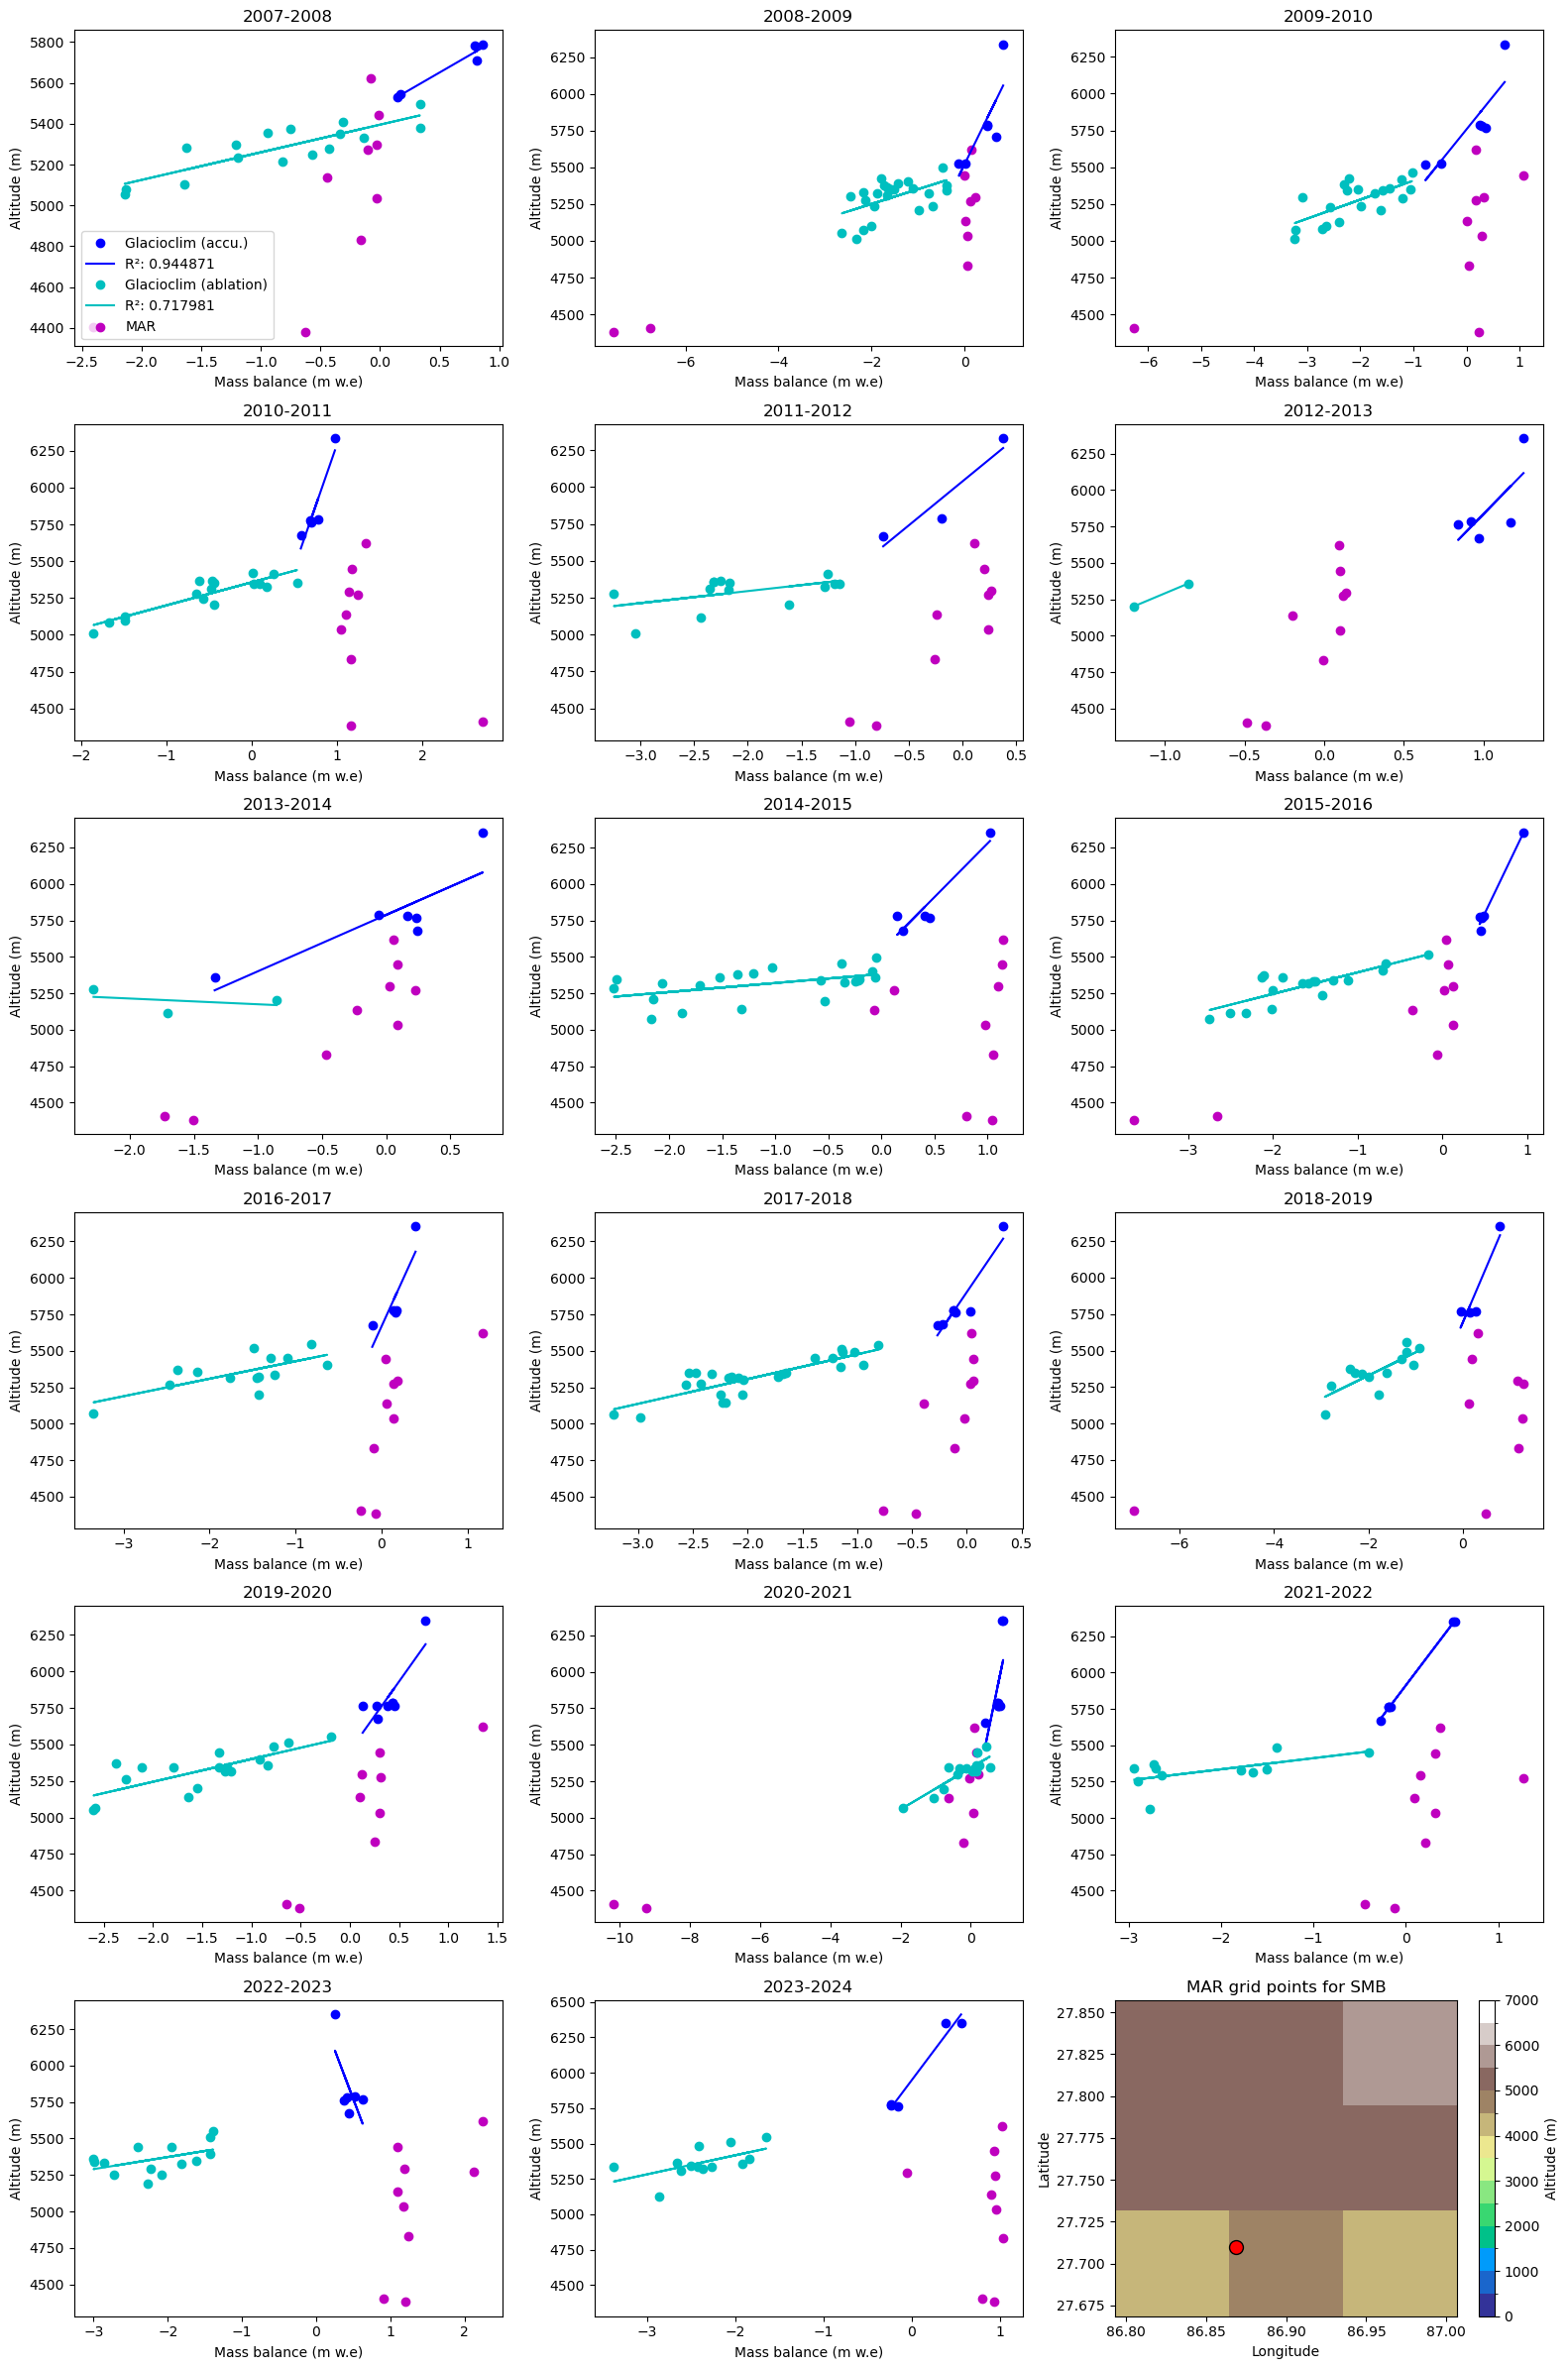

In [33]:
####### Data loading ######
variable = 'SMB'
DataPath = '/bettik/PROJECTS/pr-regional-climate/santolam/MARout_post/GRq/spin2/work/daily/' 

###### Defining subplot ######
yy = [f"{i:02}" for i in range(7, 26)] # Liste des années sous le format yy

n = len(yy)-2
col = 3
line = int(np.ceil(n/col)) # Arrondi à l'entier supérieur le nombre de colonne à plot, et le met au format 'nombre entier'
fig, axes = plt.subplots(line,col,figsize=(16,4*line))
axes = axes.flatten() # Transforme le tableau 2D en tableau 1D (accessible avec 1 indice (j))



for j in range(n):
    ax = axes[j] # Remplissage subplot avec indice de la boucle

###### OBS_data loading and sorting ######    
    df = pd.read_excel('/home/turpinli/Mera_SMB/AnnualMB_Mera_'+yy[j]+'_'+yy[j+1]+'.xlsx', header=1) #pandas permet ici de lire les fichiers .xlsx et prenant les colonnes à partir de la 2ème ligne
    date_obs = df["Date_end"].iloc[4].replace(hour=12, minute=0, second=0) # Récupère la date de la mesure SMB
    date_obs = date_obs.strftime("%Y-%m-%dT%H:%M:%S") # Formate l'écriture de la date au format MAR

    MB = df.filter(regex=r"^Mass balance \(").columns[0] # Regex recupère les données dans la colonne Mass balance, peut importe ce qui suit dans la chaine de caractères 
    df[MB] = pd.to_numeric(df[MB], errors="coerce") # Force la colonne à prendre la forme d'un nombre (car unité en haut de colonne)
    df["Altitude_end"] = pd.to_numeric(df["Altitude_end"], errors="coerce") # Coerce donne NaN si la valeur n'est pas convertible en nombre

    df = df.dropna(subset=["Altitude_end",MB]) # Supprime les NaN dans les colonnes

    df_ablation = df[df["#station"].str.match(r"^\d") | (df["#station"] == "AWS")] # Catégorise les stations qui commencent par un chiffre ou qui sont strictement AWS, en ablaion
    df_accu = df[~(df["#station"].str.match(r"^\d") | (df["#station"] == "AWS"))] # Le ~ est la condition "not" --> Tout le reste / (r"^\d" identifie les chiffres) et "|" vérifie les deux conditions 

    
###### Accumulation ######
    x_accu = df_accu[MB]
    y_accu = df_accu["Altitude_end"]

    ax.plot(x_accu,y_accu, linestyle="", marker="o",color='b', label='Glacioclim (accu.)')
    
    if len(x_accu)>=2: # Regression linéaire si 2 valeurs ou plus
        res = stats.linregress(x_accu, y_accu) # Régression linéaire sur les deux séries de données
        ax.plot(x_accu,res.intercept+res.slope*x_accu, 'b', label=f"R²: {res.rvalue**2:.6f}") # \np-value: {res.pvalue:.6g}") # Trace x par y =ax+b=slope*x+intercept)

    
##### Ablation ######
    x_ablation = df_ablation[MB]
    y_ablation = df_ablation["Altitude_end"]

    ax.plot(x_ablation,y_ablation, linestyle="", marker="o", color='c', label='Glacioclim (ablation)')
    
    if len(x_ablation)>=2:
        res = stats.linregress(x_ablation, y_ablation) # Régression linéaire sur les deux séries de données
        ax.plot(x_ablation,res.intercept+res.slope*x_ablation, 'c', label=f"R²: {res.rvalue**2:.6f}") # \np-value: {res.pvalue:.6g}") # Trace x par y =ax+b=slope*x+intercept)
    

###### MAR_data loading and sorting  ######    
    file = variable+'_daysum_MARv3.14_ER5_spin2_GRq_20'+yy[j+1]+'.nc'
    ds_SMBy = xr.open_dataset(DataPath+file).SMB.isel(SECTOR=0).load() # SECTOR ?
    ds_SMBy = ds_SMBy[:,k:-k,k:-k]
    
    SMB_day3 = ds_SMBy.sel(TIME=date_obs).isel(Y=slice(iY, iY+3), X=slice(iX-1, iX+2)) # Valeur du SMB à la date exact de l'obs (glacioclim)
    SMB_MAR3 = SMB_day3.values.flatten() 

    SH_MAR3 = ds_SH.isel(y=slice(iY, iY+3), x=slice(iX-1, iX+2)).values.flatten() # Altitude des grilles de MAR

    ax.scatter(SMB_MAR3, SH_MAR3, color="m", label="MAR") # Affiche les points de MAR correspondant à la date des obs

###### Graphic features ######
    ax.set_title(f"20{yy[j]}-20{yy[j+1]}")
    ax.set_xlabel("Mass balance (m w.e)")
    ax.set_ylabel("Altitude (m)")
#    ax.set_xlim(-4, 2) # Restriction du domaine 
#    ax.set_ylim(4700, 6400) # Restriction du domaine 
    
    if j == 0: # Affiche la légende pour la première figure
        ax.legend()

####### Grid on last subplot ######
ax = axes[n]
ds_SH3 = ds_SH.isel(y=slice(iY, iY+3), x=slice(iX-1, iX+2)) # Selectionne le SMB sur les grilles données
ds_lat_mera3 = ds_lat.isel(y=slice(iY, iY+3), x=slice(iX-1, iX+2)) # Selectionne les lon lat pour les plot
ds_lon_mera3 = ds_lon.isel(y=slice(iY, iY+3), x=slice(iX-1, iX+2))

x, y = np.meshgrid([0,1,2], [0,1,2])

clevs = np.arange(0, 7500, 500) # Echelle de couleur de topographie de 0 à 7500 tout les 500m d'alt
cmap = plt.get_cmap("terrain") # Palette de couleur pour les reliefs 
norm = mcolors.BoundaryNorm(boundaries=clevs, ncolors=cmap.N) # Attribut à chaque bande d'altitude une couleur de la palette "terrain"

ax.plot(merap_lon, merap_lat, marker='o', markersize=10, markeredgecolor='black', markerfacecolor='red') # Mera peak

pcm = ax.pcolormesh(ds_lon_mera3, ds_lat_mera3, ds_SH3, cmap=cmap, norm=norm, shading='auto')
fig.colorbar(pcm, ax=ax, label="Altitude (m)")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("MAR grid points for SMB")
plt.tight_layout()

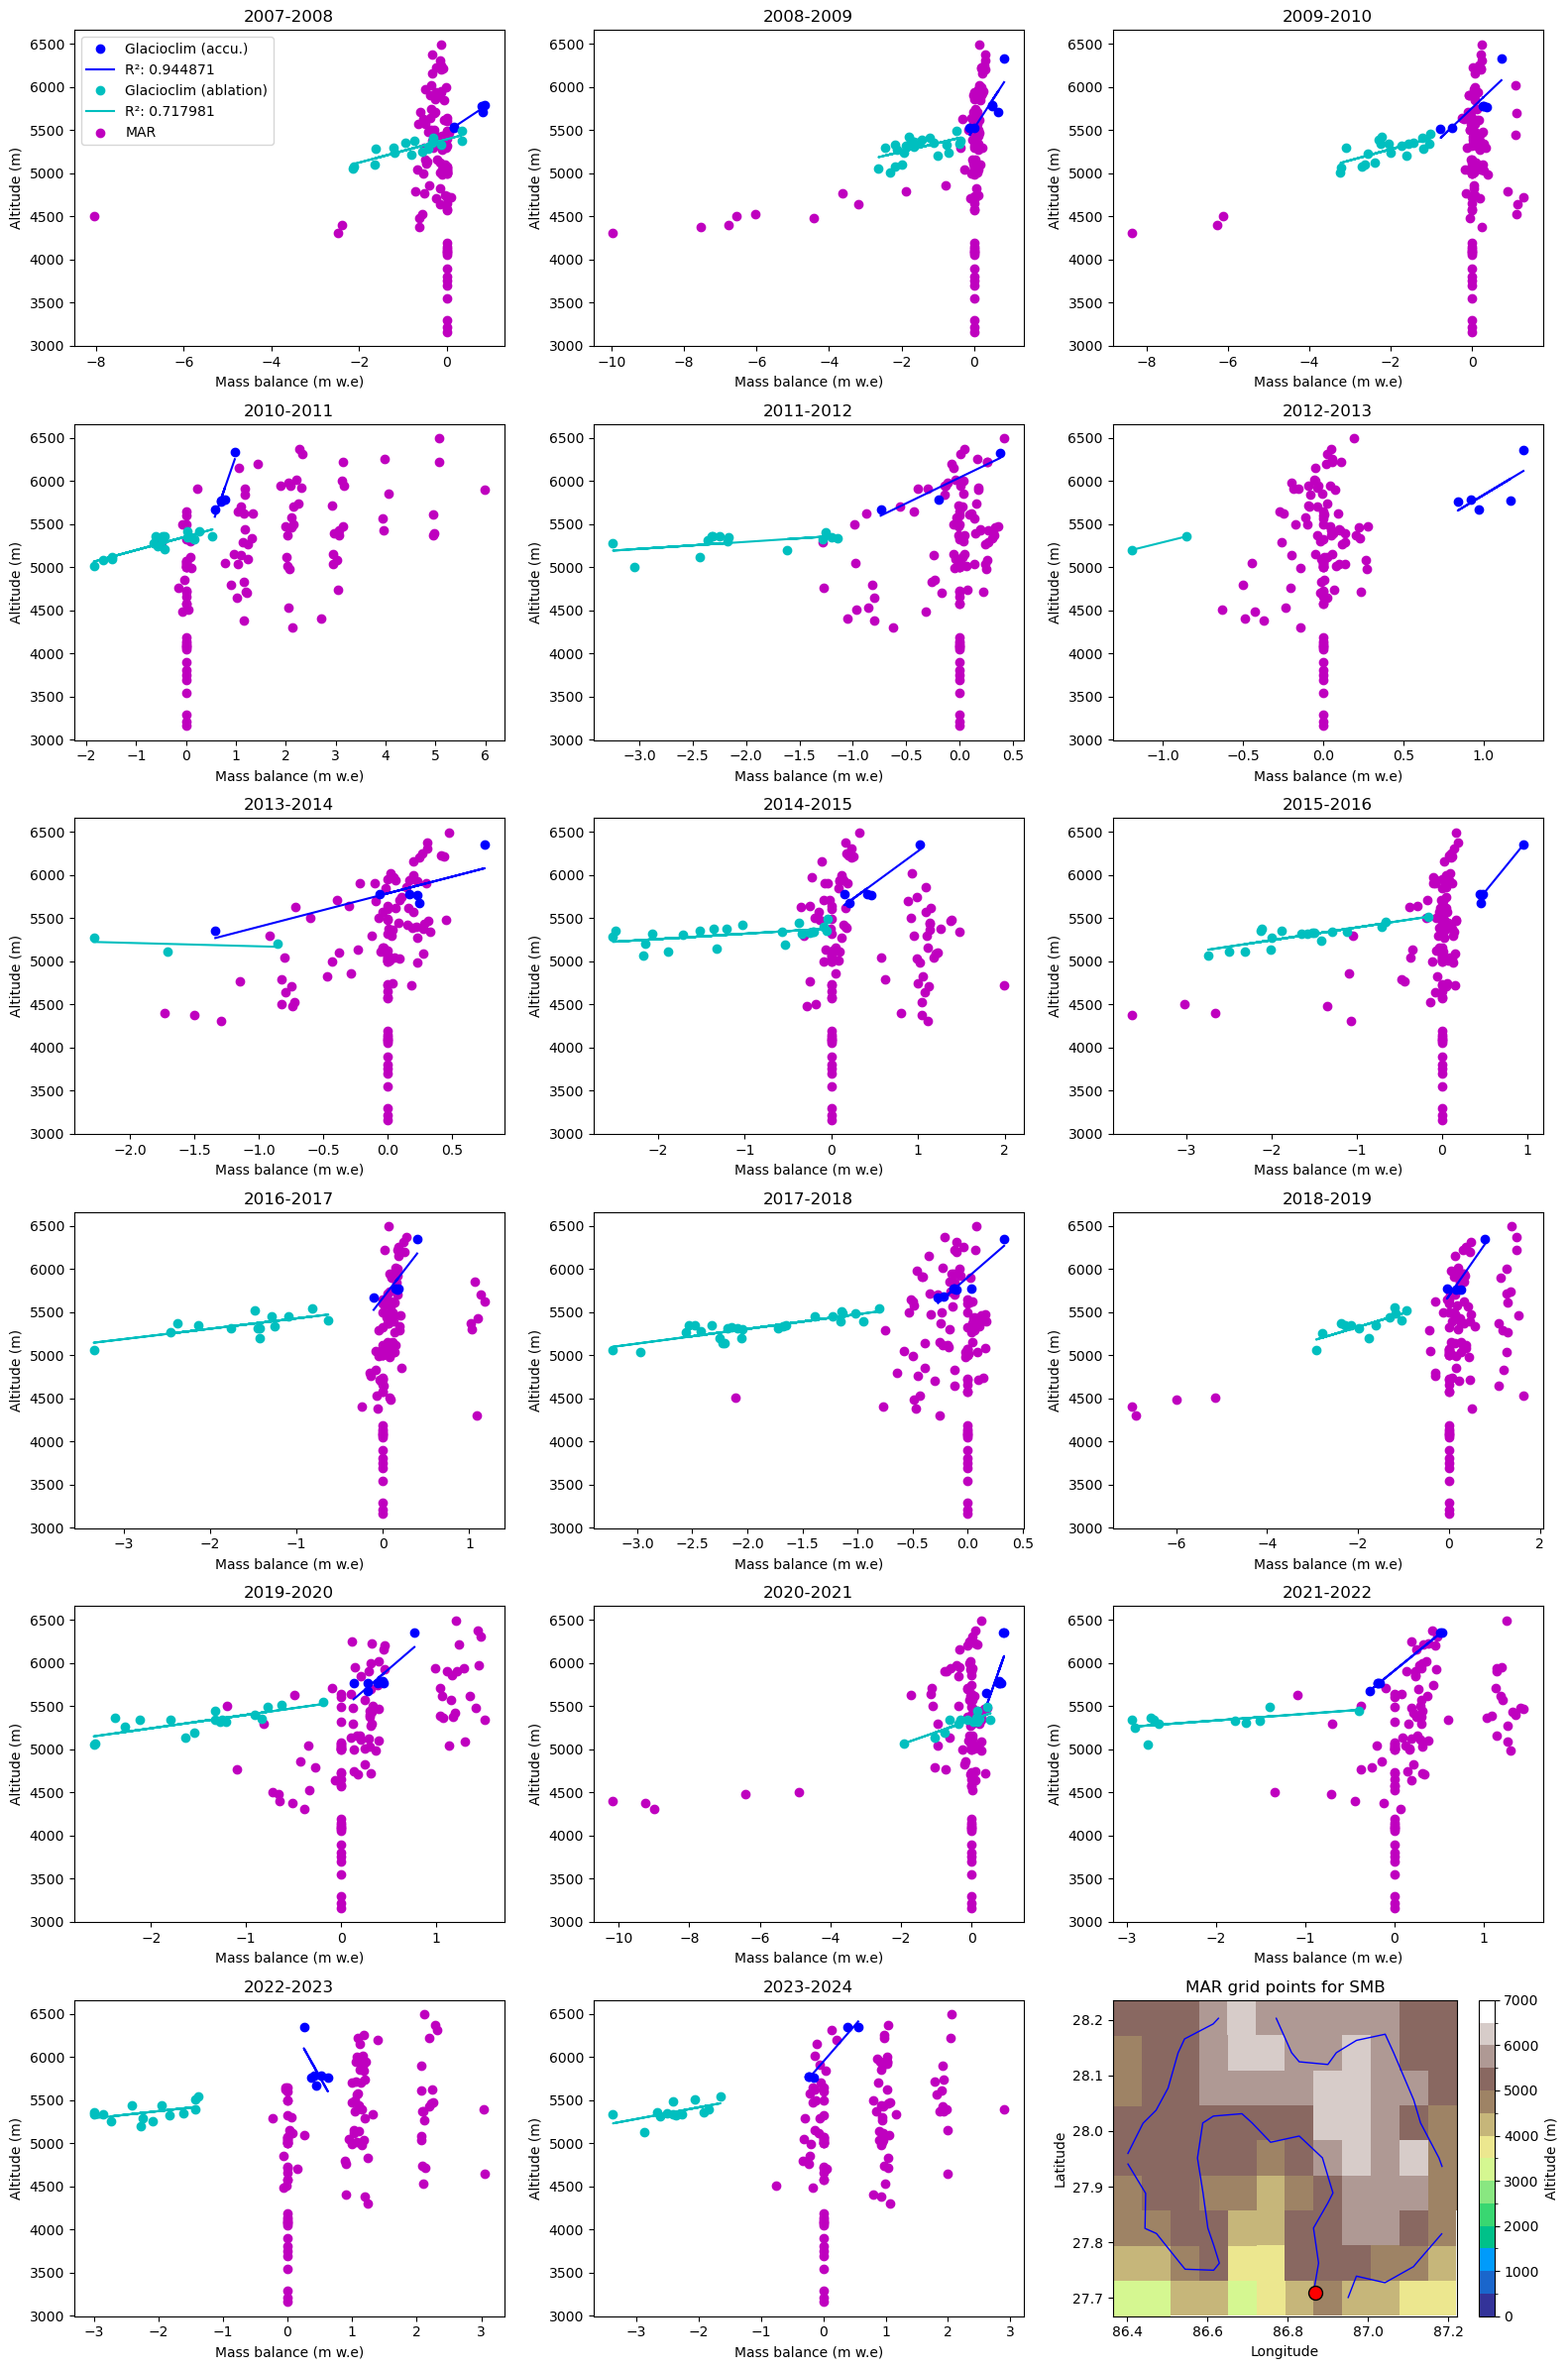

In [34]:
####### Data loading ######
variable = 'SMB'
DataPath = '/bettik/PROJECTS/pr-regional-climate/santolam/MARout_post/GRq/spin2/work/daily/' 

###### Defining subplot ######
yy = [f"{i:02}" for i in range(7, 26)] # Liste des années sous le format yy

n = len(yy)-2
col = 3
line = int(np.ceil(n/col)) # Arrondi à l'entier supérieur le nombre de colonne à plot, et le met au format 'nombre entier'
fig, axes = plt.subplots(line,col,figsize=(16,4*line))
axes = axes.flatten() # Transforme le tableau 2D en tableau 1D (accessible avec 1 indice (j))



for j in range(n):
    ax = axes[j] # Remplissage subplot avec indice de la boucle

###### OBS_data loading and sorting ######    
    df = pd.read_excel('/home/turpinli/Mera_SMB/AnnualMB_Mera_'+yy[j]+'_'+yy[j+1]+'.xlsx', header=1) #pandas permet ici de lire les fichiers .xlsx et prenant les colonnes à partir de la 2ème ligne
    date_obs = df["Date_end"].iloc[4].replace(hour=12, minute=0, second=0) # Récupère la date de la mesure SMB
    date_obs = date_obs.strftime("%Y-%m-%dT%H:%M:%S") # Formate l'écriture de la date au format MAR

    MB = df.filter(regex=r"^Mass balance \(").columns[0] # Regex recupère les données dans la colonne Mass balance, peut importe ce qui suit dans la chaine de caractères 
    df[MB] = pd.to_numeric(df[MB], errors="coerce") # Force la colonne à prendre la forme d'un nombre (car unité en haut de colonne)
    df["Altitude_end"] = pd.to_numeric(df["Altitude_end"], errors="coerce") # Coerce donne NaN si la valeur n'est pas convertible en nombre

    df = df.dropna(subset=["Altitude_end",MB]) # Supprime les NaN dans les colonnes

    df_ablation = df[df["#station"].str.match(r"^\d") | (df["#station"] == "AWS")] # Catégorise les stations qui commencent par un chiffre ou qui sont strictement AWS, en ablaion
    df_accu = df[~(df["#station"].str.match(r"^\d") | (df["#station"] == "AWS"))] # Le ~ est la condition "not" --> Tout le reste / (r"^\d" identifie les chiffres) et "|" vérifie les deux conditions 

    
###### Accumulation ######
    x_accu = df_accu[MB]
    y_accu = df_accu["Altitude_end"]

    ax.plot(x_accu,y_accu, linestyle="", marker="o",color='b', label='Glacioclim (accu.)')
    
    if len(x_accu)>=2: # Regression linéaire si 2 valeurs ou plus
        res = stats.linregress(x_accu, y_accu) # Régression linéaire sur les deux séries de données
        ax.plot(x_accu,res.intercept+res.slope*x_accu, 'b', label=f"R²: {res.rvalue**2:.6f}") # \np-value: {res.pvalue:.6g}") # Trace x par y =ax+b=slope*x+intercept)

    
##### Ablation ######
    x_ablation = df_ablation[MB]
    y_ablation = df_ablation["Altitude_end"]

    ax.plot(x_ablation,y_ablation, linestyle="", marker="o", color='c', label='Glacioclim (ablation)')
    
    if len(x_ablation)>=2:
        res = stats.linregress(x_ablation, y_ablation) # Régression linéaire sur les deux séries de données
        ax.plot(x_ablation,res.intercept+res.slope*x_ablation, 'c', label=f"R²: {res.rvalue**2:.6f}") # \np-value: {res.pvalue:.6g}") # Trace x par y =ax+b=slope*x+intercept)
    

###### MAR_data loading and sorting  ######    
    file = variable+'_daysum_MARv3.14_ER5_spin2_GRq_20'+yy[j+1]+'.nc'
    ds_SMBy = xr.open_dataset(DataPath+file).SMB.isel(SECTOR=0).load() # SECTOR ?
    ds_SMBy = ds_SMBy[:,k:-k,k:-k]
    
    SMB_day_khumbu = ds_SMBy.sel(TIME=date_obs).isel(Y=slice(iY, iY+9), X=slice(iX-7, iX+5)) # Valeur du SMB à la date exact de l'obs (glacioclim)
    SMB_MAR_khumbu = SMB_day_khumbu.values.flatten() 

    SH_MAR_khumbu = ds_SH.isel(y=slice(iY, iY+9), x=slice(iX-7, iX+5)).values.flatten() # Altitude des grilles de MAR

    ax.scatter(SMB_MAR_khumbu, SH_MAR_khumbu, color="m", label="MAR") # Affiche les points de MAR correspondant à la date des obs

###### Graphic features ######
    ax.set_title(f"20{yy[j]}-20{yy[j+1]}")
    ax.set_xlabel("Mass balance (m w.e)")
    ax.set_ylabel("Altitude (m)")
#    ax.set_xlim(-4, 2) # Restriction du domaine 
#    ax.set_ylim(4700, 6400) # Restriction du domaine 
    
    if j == 0: # Affiche la légende pour la première figure
        ax.legend()

####### Grid on last subplot ######
ax = axes[n]
ds_SH_khumbu = ds_SH.isel(y=slice(iY, iY+9), x=slice(iX-7, iX+5)) # Selectionne le SMB sur les grilles données
ds_lat_khumbu = ds_lat.isel(y=slice(iY, iY+9), x=slice(iX-7, iX+5)) # Selectionne les lon lat pour les plot
ds_lon_khumbu = ds_lon.isel(y=slice(iY, iY+9), x=slice(iX-7, iX+5))

x, y = np.meshgrid([0,1,2], [0,1,2])

clevs = np.arange(0, 7500, 500) # Echelle de couleur de topographie de 0 à 7500 tout les 500m d'alt
cmap = plt.get_cmap("terrain") # Palette de couleur pour les reliefs 
norm = mcolors.BoundaryNorm(boundaries=clevs, ncolors=cmap.N) # Attribut à chaque bande d'altitude une couleur de la palette "terrain"

plt.contour(ds_lon_khumbu, ds_lat_khumbu, ds_ICE_khumbu, levels=[ice_level], colors="b", linewidths=1) # Contours glaciers
ax.plot(merap_lon, merap_lat, marker='o', markersize=10, markeredgecolor='black', markerfacecolor='red') # Mera peak

pcm = ax.pcolormesh(ds_lon_khumbu, ds_lat_khumbu, ds_SH_khumbu, cmap=cmap, norm=norm, shading='auto')
fig.colorbar(pcm, ax=ax, label="Altitude (m)")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("MAR grid points for SMB")
plt.tight_layout()